# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
print(f"The shape of the data is {df_data.shape}.")
print(f"The number of rows is {df_data.shape[0]}.")
print(f"The number of columns is {df_data.shape[1]}.")
print("The column names are as follows:")
print(", ".join(df_data.columns.to_list()))
df_data.head()


The shape of the data is (962, 16).
The number of rows is 962.
The number of columns is 16.
The column names are as follows:
year, category, prize, motivation, prize_share, laureate_type, full_name, birth_date, birth_city, birth_country, birth_country_current, sex, organization_name, organization_city, organization_country, ISO


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [6]:
print(f"The first prize was awarded in {df_data['year'].min()}.")
print(f"The last prize was awarded in {df_data['year'].max()}.")

The first prize was awarded in 1901.
The last prize was awarded in 2020.


**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [7]:
print(f"The number of duplicate values in the considered dataset is: {df_data.duplicated().sum()}")

The number of duplicate values in the considered dataset is: 0


### Check for NaN Values

In [8]:
print(f"The number of NaN values in the considered dataset is: {df_data.isna().sum().sum()}")
print(f"The columns having NaN values are: {', '.join(df_data.columns[df_data.isna().any()].to_list())}.")
print(f"The number of NaN values per column are as follows:")
print(df_data.isna().sum())

The number of NaN values in the considered dataset is: 1023
The columns having NaN values are: motivation, birth_date, birth_city, birth_country, birth_country_current, sex, organization_name, organization_city, organization_country, ISO.
The number of NaN values per column are as follows:
year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


In [9]:
print("The reason the columns have these NaN values is:")

The reason the columns have these NaN values is:


✅ Reasons the columns might have NaN values:

organization_name, organization_city, organization_country
→ Some laureates are independent researchers, writers, activists, or organizations themselves — so there may be no associated university, lab, or company recorded.

birth_date, birth_city, birth_country, birth_country_current
→ Historical laureates (especially early 20th century or 19th century figures) may have incomplete biographical records; sometimes data simply wasn’t preserved or is unknown.

sex
→ In rare historical cases, the sex/gender of the laureate might not be recorded, or the laureate is an organization (not an individual person), which doesn’t have a sex.

ISO
→ If birth_country_current is missing or historically complex (countries that dissolved, merged, or changed names), the ISO country code may be unavailable.

Other columns
→ Could be missing due to inconsistent data entry, optional fields, or fields that don’t apply to every type of laureate (e.g., Peace Prize sometimes awarded to organizations).

In [10]:
df_data_clean=df_data.drop_duplicates()
df_data_clean=df_data_clean.dropna()

### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [11]:
df_data_clean['birth_date'] = pd.to_datetime(df_data['birth_date'], format='%Y-%m-%d', errors='coerce')
df_data_clean['year_date'] = pd.to_datetime(df_data_clean['year'], format='%Y', errors='coerce')


#### Add a Column with the Prize Share as a Percentage

In [12]:
df_data_clean['share_pct']=df_data['prize_share'].apply(lambda x:eval(x) * 100 if '/' in x else float(x)*100)


In [13]:
df_data_clean.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,year_date,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1901-01-01,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1901-01-01,100.00
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU,1901-01-01,100.00
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Germany,Male,Berlin University,Berlin,Germany,DEU,1902-01-01,100.00
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,Individual,Ronald Ross,1857-05-13,Almora,India,India,Male,University College London,Liverpool,United Kingdom,IND,1902-01-01,100.00


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [14]:
print(f"The number of laurates that are men is: {df_data_clean['sex'].value_counts()['Male']}")
print(f"The number of laurates that are women is: {df_data_clean['sex'].value_counts()['Female']}")


The number of laurates that are men is: 674
The number of laurates that are women is: 24


In [15]:
import plotly.express as px
fig=px.pie(df_data_clean, names='sex', hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Percentage of Male vs. Female Laureates', uniformtext_minsize=12, uniformtext_mode='hide' )
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [16]:
df_data_clean_women = df_data_clean[df_data_clean['sex'] == 'Female'].copy()
df_data_clean_women.sort_values(by='year', inplace=True)

first_three_women = df_data_clean_women['full_name'].head(3).to_list()

print("The first three women to win Nobel Laureates were:")
print('\n'.join(first_three_women))


The first three women to win Nobel Laureates were:
Marie Curie, née Sklodowska
Irène Joliot-Curie
Gerty Theresa Cori, née Radnitz


In [17]:
for i, row in enumerate(df_data_clean_women.iterrows(), 1):
    woman = row[1]['full_name']
    work = row[1]['motivation'].strip('"').replace('for ', '', 1)  # remove first leading 'for '
    prize = row[1]['prize'].replace('The ', '')
    print(f"{i}. {woman}\n   → {prize}\n   🏆 {work}\n")

1. Marie Curie, née Sklodowska
   → Nobel Prize in Chemistry 1911
   🏆 in recognition of her services to the advancement of chemistry by the discovery of the elements radium and polonium, by the isolation of radium and the study of the nature and compounds of this remarkable element

2. Irène Joliot-Curie
   → Nobel Prize in Chemistry 1935
   🏆 in recognition of their synthesis of new radioactive elements

3. Gerty Theresa Cori, née Radnitz
   → Nobel Prize in Physiology or Medicine 1947
   🏆 their discovery of the course of the catalytic conversion of glycogen

4. Maria Goeppert Mayer
   → Nobel Prize in Physics 1963
   🏆 their discoveries concerning nuclear shell structure

5. Dorothy Crowfoot Hodgkin
   → Nobel Prize in Chemistry 1964
   🏆 her determinations by X-ray techniques of the structures of important biochemical substances

6. Rosalyn Yalow
   → Nobel Prize in Physiology or Medicine 1977
   🏆 the development of radioimmunoassays of peptide hormones

7. Barbara McClintock
   

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

In [18]:
repeat_winners = df_data_clean['full_name'].value_counts()
repeat_winners = repeat_winners[repeat_winners > 1].index.to_list()

print("The people who got the prizes more than once are:")
print('\n'.join(repeat_winners))

The people who got the prizes more than once are:
Frederick Sanger
John Bardeen


# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [19]:
print(f"The number of categories in which prizes were awarded is: {df_data_clean['category'].nunique()}.")

The number of categories in which prizes were awarded is: 4.


In [20]:
fig=px.bar(df_data_clean, x='category', color='category', color_discrete_sequence=px.colors.sequential.Aggrnyl, y='prize', text='prize', title='Number of Prizes per Category')
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(showlegend=False)
fig.show()

In [21]:
print(f"The category having the most number of prizes awarded is: {df_data_clean['category'].value_counts().index[0]}.")
print(f"The category having the fewest number of prizes awarded is: {df_data_clean['category'].value_counts().index[-1]}.")

The category having the most number of prizes awarded is: Medicine.
The category having the fewest number of prizes awarded is: Economics.


**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [22]:
econ = df_data_clean[df_data_clean['category'] == 'Economics'].sort_values(by='year')
print(f"The first prize in the field of Economics was awarded in {econ['year'].iloc[0]}.")
print(f"The prize went to: {econ['full_name'].iloc[0]}.")

The first prize in the field of Economics was awarded in 1969.
The prize went to: Jan Tinbergen.


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [23]:
cat_men_women=df_data_clean.groupby(['category', 'sex'], as_index=False).agg({'prize':pd.Series.count})
cat_men_women.sort_values(by='prize', ascending=False, inplace=True)
cat_men_women.head()

,category,sex,prize
7,Physics,Male,208
5,Medicine,Male,208
1,Chemistry,Male,176
3,Economics,Male,82
4,Medicine,Female,12


In [24]:
fig=px.bar(cat_men_women, x=cat_men_women.category, y=cat_men_women.prize, color=cat_men_women.sex, title='Number of Prizes Awarded per Category split by Men and Women')
fig.update_layout(xaxis_title='Nobel Prize Category',
                  yaxis_title='Number of Prizes')
fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [25]:
print(f"The number of prizes awarded every year is as follows:")
prize_per_year=df_data_clean.groupby(['year'], as_index=False).agg({'prize':pd.Series.count})
prize_per_year.head()

The number of prizes awarded every year is as follows:


,year,prize
0,1901,3
1,1902,4
2,1903,4
3,1904,3
4,1905,3


In [26]:
print(f"The 5 year rolling average of the number of prizes is as follows:")
prize_per_year['rolling_avg']=prize_per_year['prize'].rolling(5).mean()
prize_per_year.fillna(0, inplace=True)
prize_per_year.head()

The 5 year rolling average of the number of prizes is as follows:


,year,prize,rolling_avg
0,1901,3,0.00
1,1902,4,0.00
2,1903,4,0.00
3,1904,3,0.00
4,1905,3,3.40


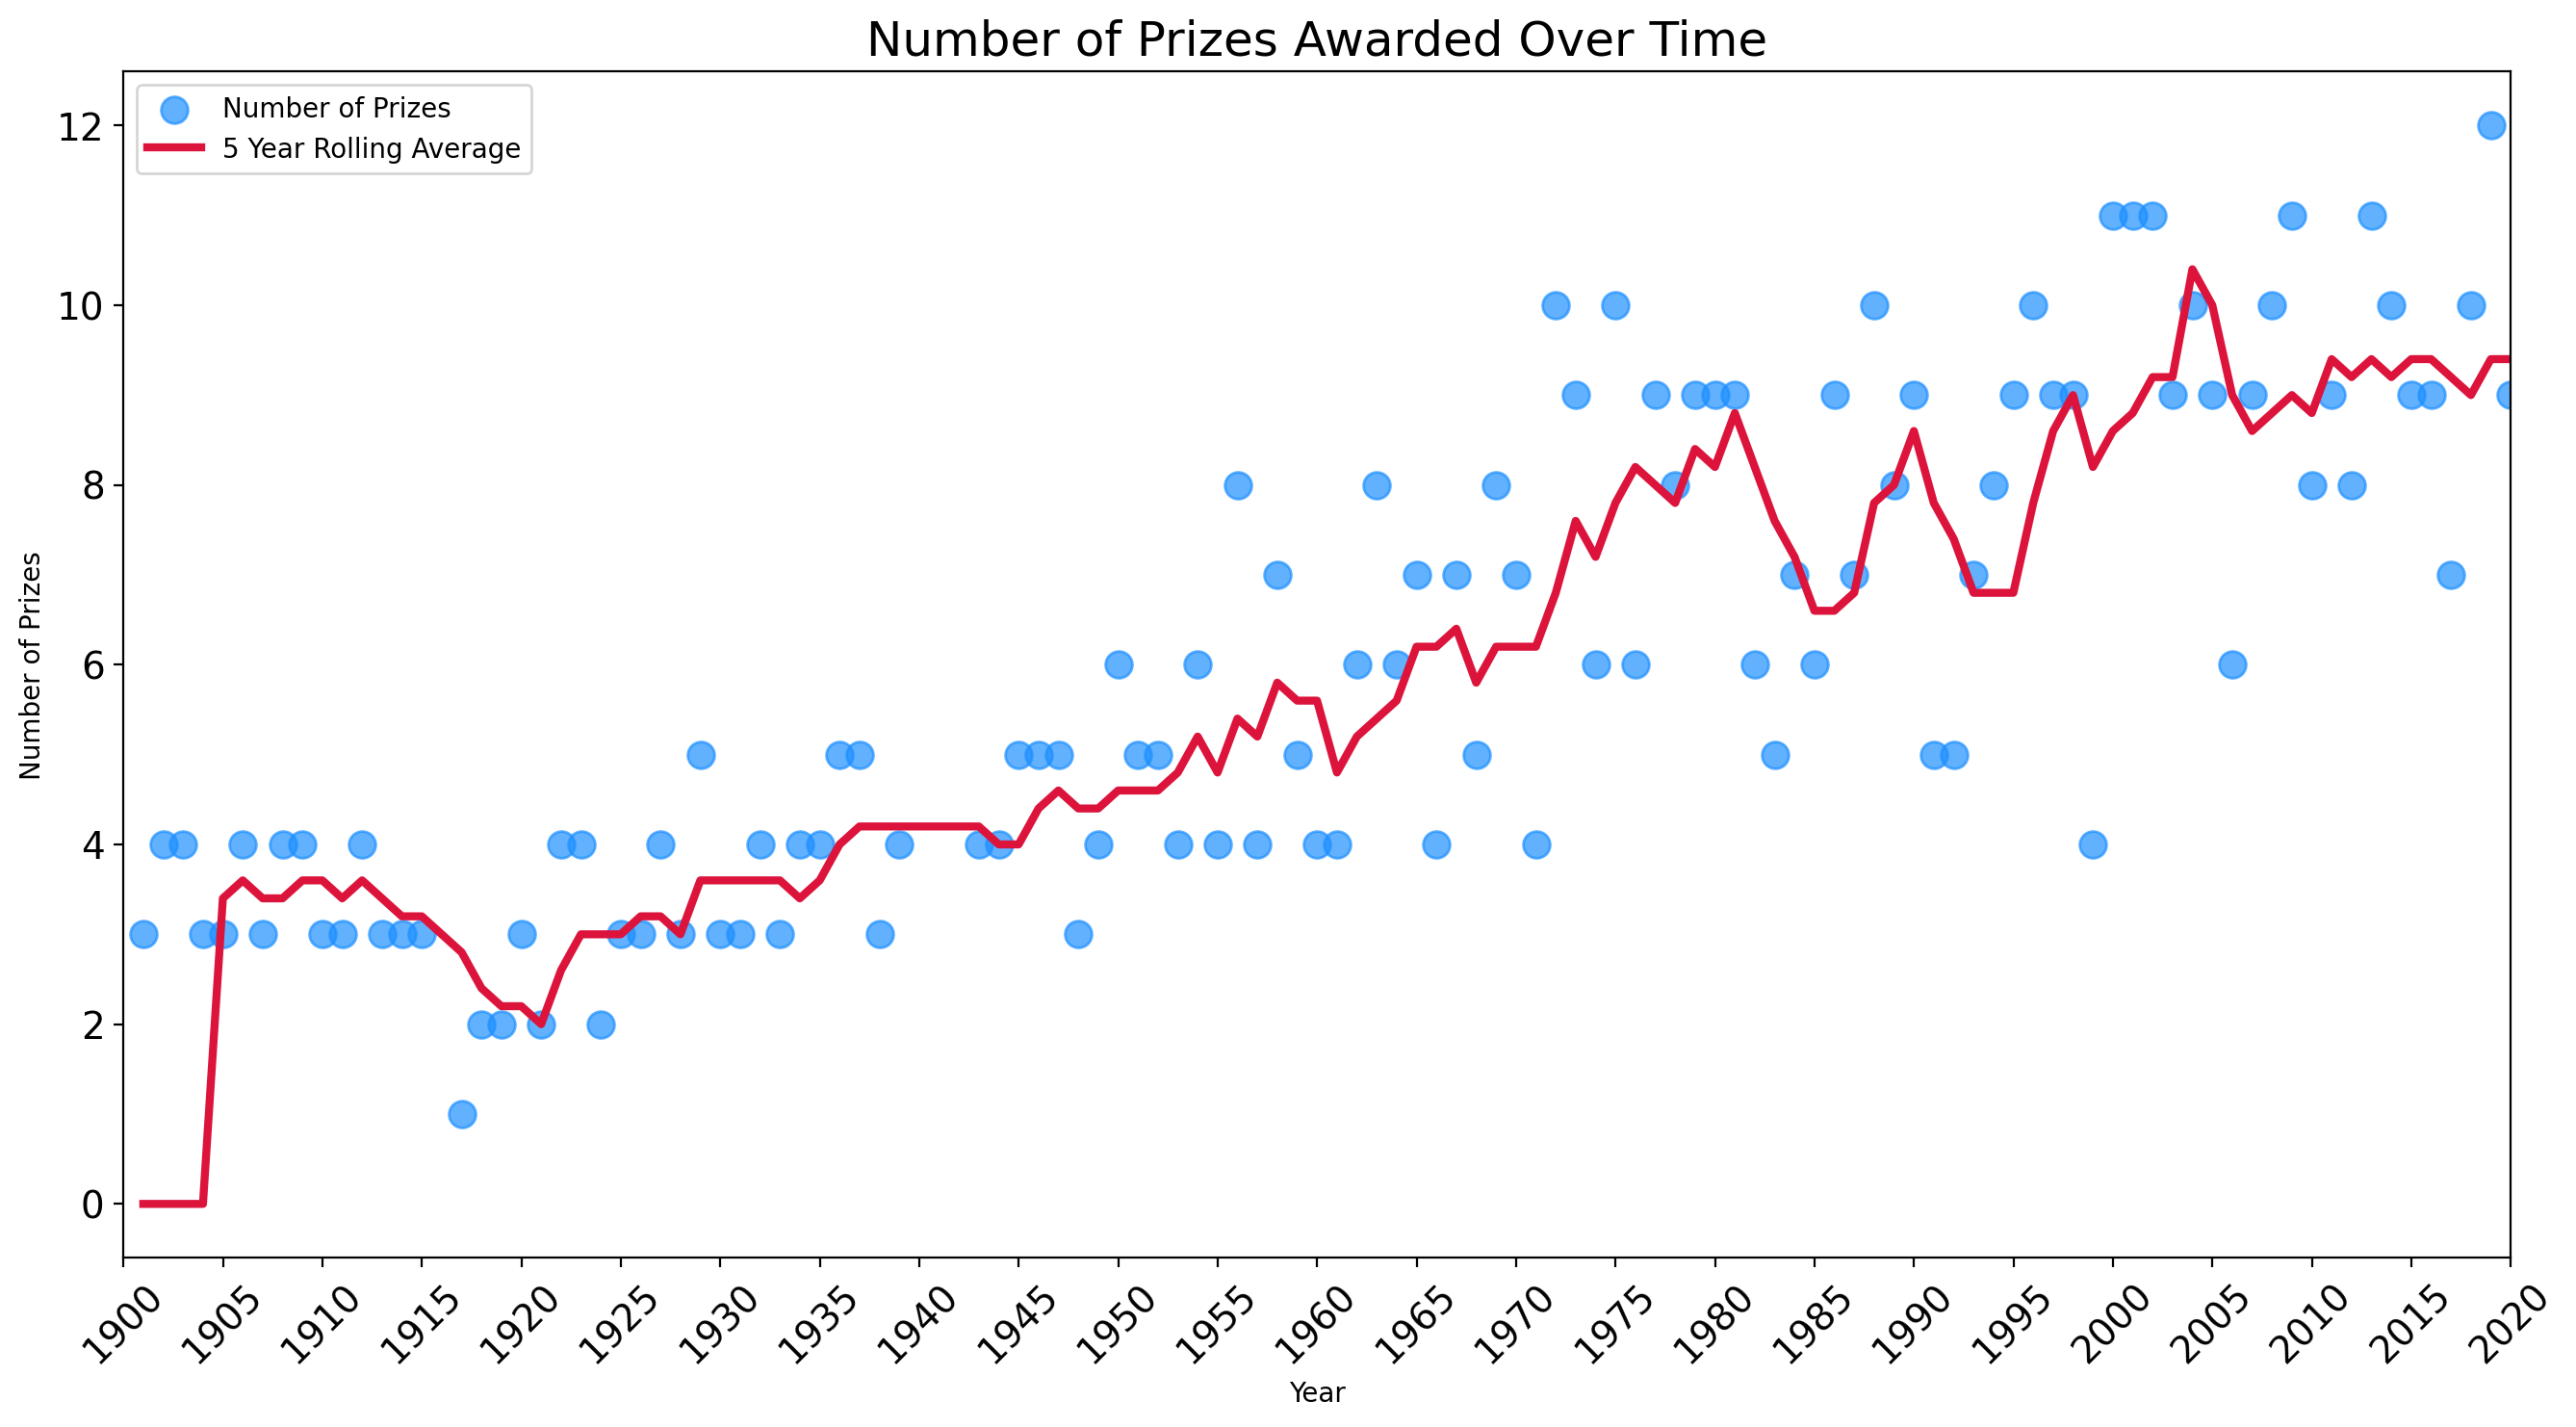

In [27]:
plt.figure(figsize=(16, 8), dpi=200)
plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Number of Prizes Awarded Over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(np.arange(1900, 2021, step=5), rotation=45, fontsize=14)
ax=plt.gca()
ax.set_xlim(1900, 2020)
ax.scatter(x=prize_per_year['year'], y=prize_per_year['prize'], c='dodgerblue', alpha=0.7, s=100, label='Number of Prizes')
ax.plot(prize_per_year['year'], prize_per_year['rolling_avg'], color='crimson', linewidth=3, label='5 Year Rolling Average')
plt.legend()
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

In [28]:
print(f"The average prize share of the winners on a year by year basis is as follows:")
share_per_year=df_data_clean.groupby(['year'], as_index=False).agg({'share_pct':pd.Series.mean})
share_per_year

The average prize share of the winners on a year by year basis is as follows:


,year,share_pct
0,1901,100.00
1,1902,75.00
2,1903,68.75
3,1904,100.00
4,1905,100.00
...,...,...
111,2016,44.44
112,2017,42.86
113,2018,40.00
114,2019,33.33


In [29]:
share_per_year['rolling_avg']=share_per_year['share_pct'].rolling(5).mean()
share_per_year.fillna(0, inplace=True)
share_per_year

,year,share_pct,rolling_avg
0,1901,100.00,0.00
1,1902,75.00,0.00
2,1903,68.75,0.00
3,1904,100.00,0.00
4,1905,100.00,88.75
...,...,...,...
111,2016,44.44,43.05
112,2017,42.86,41.62
113,2018,40.00,42.35
114,2019,33.33,41.02


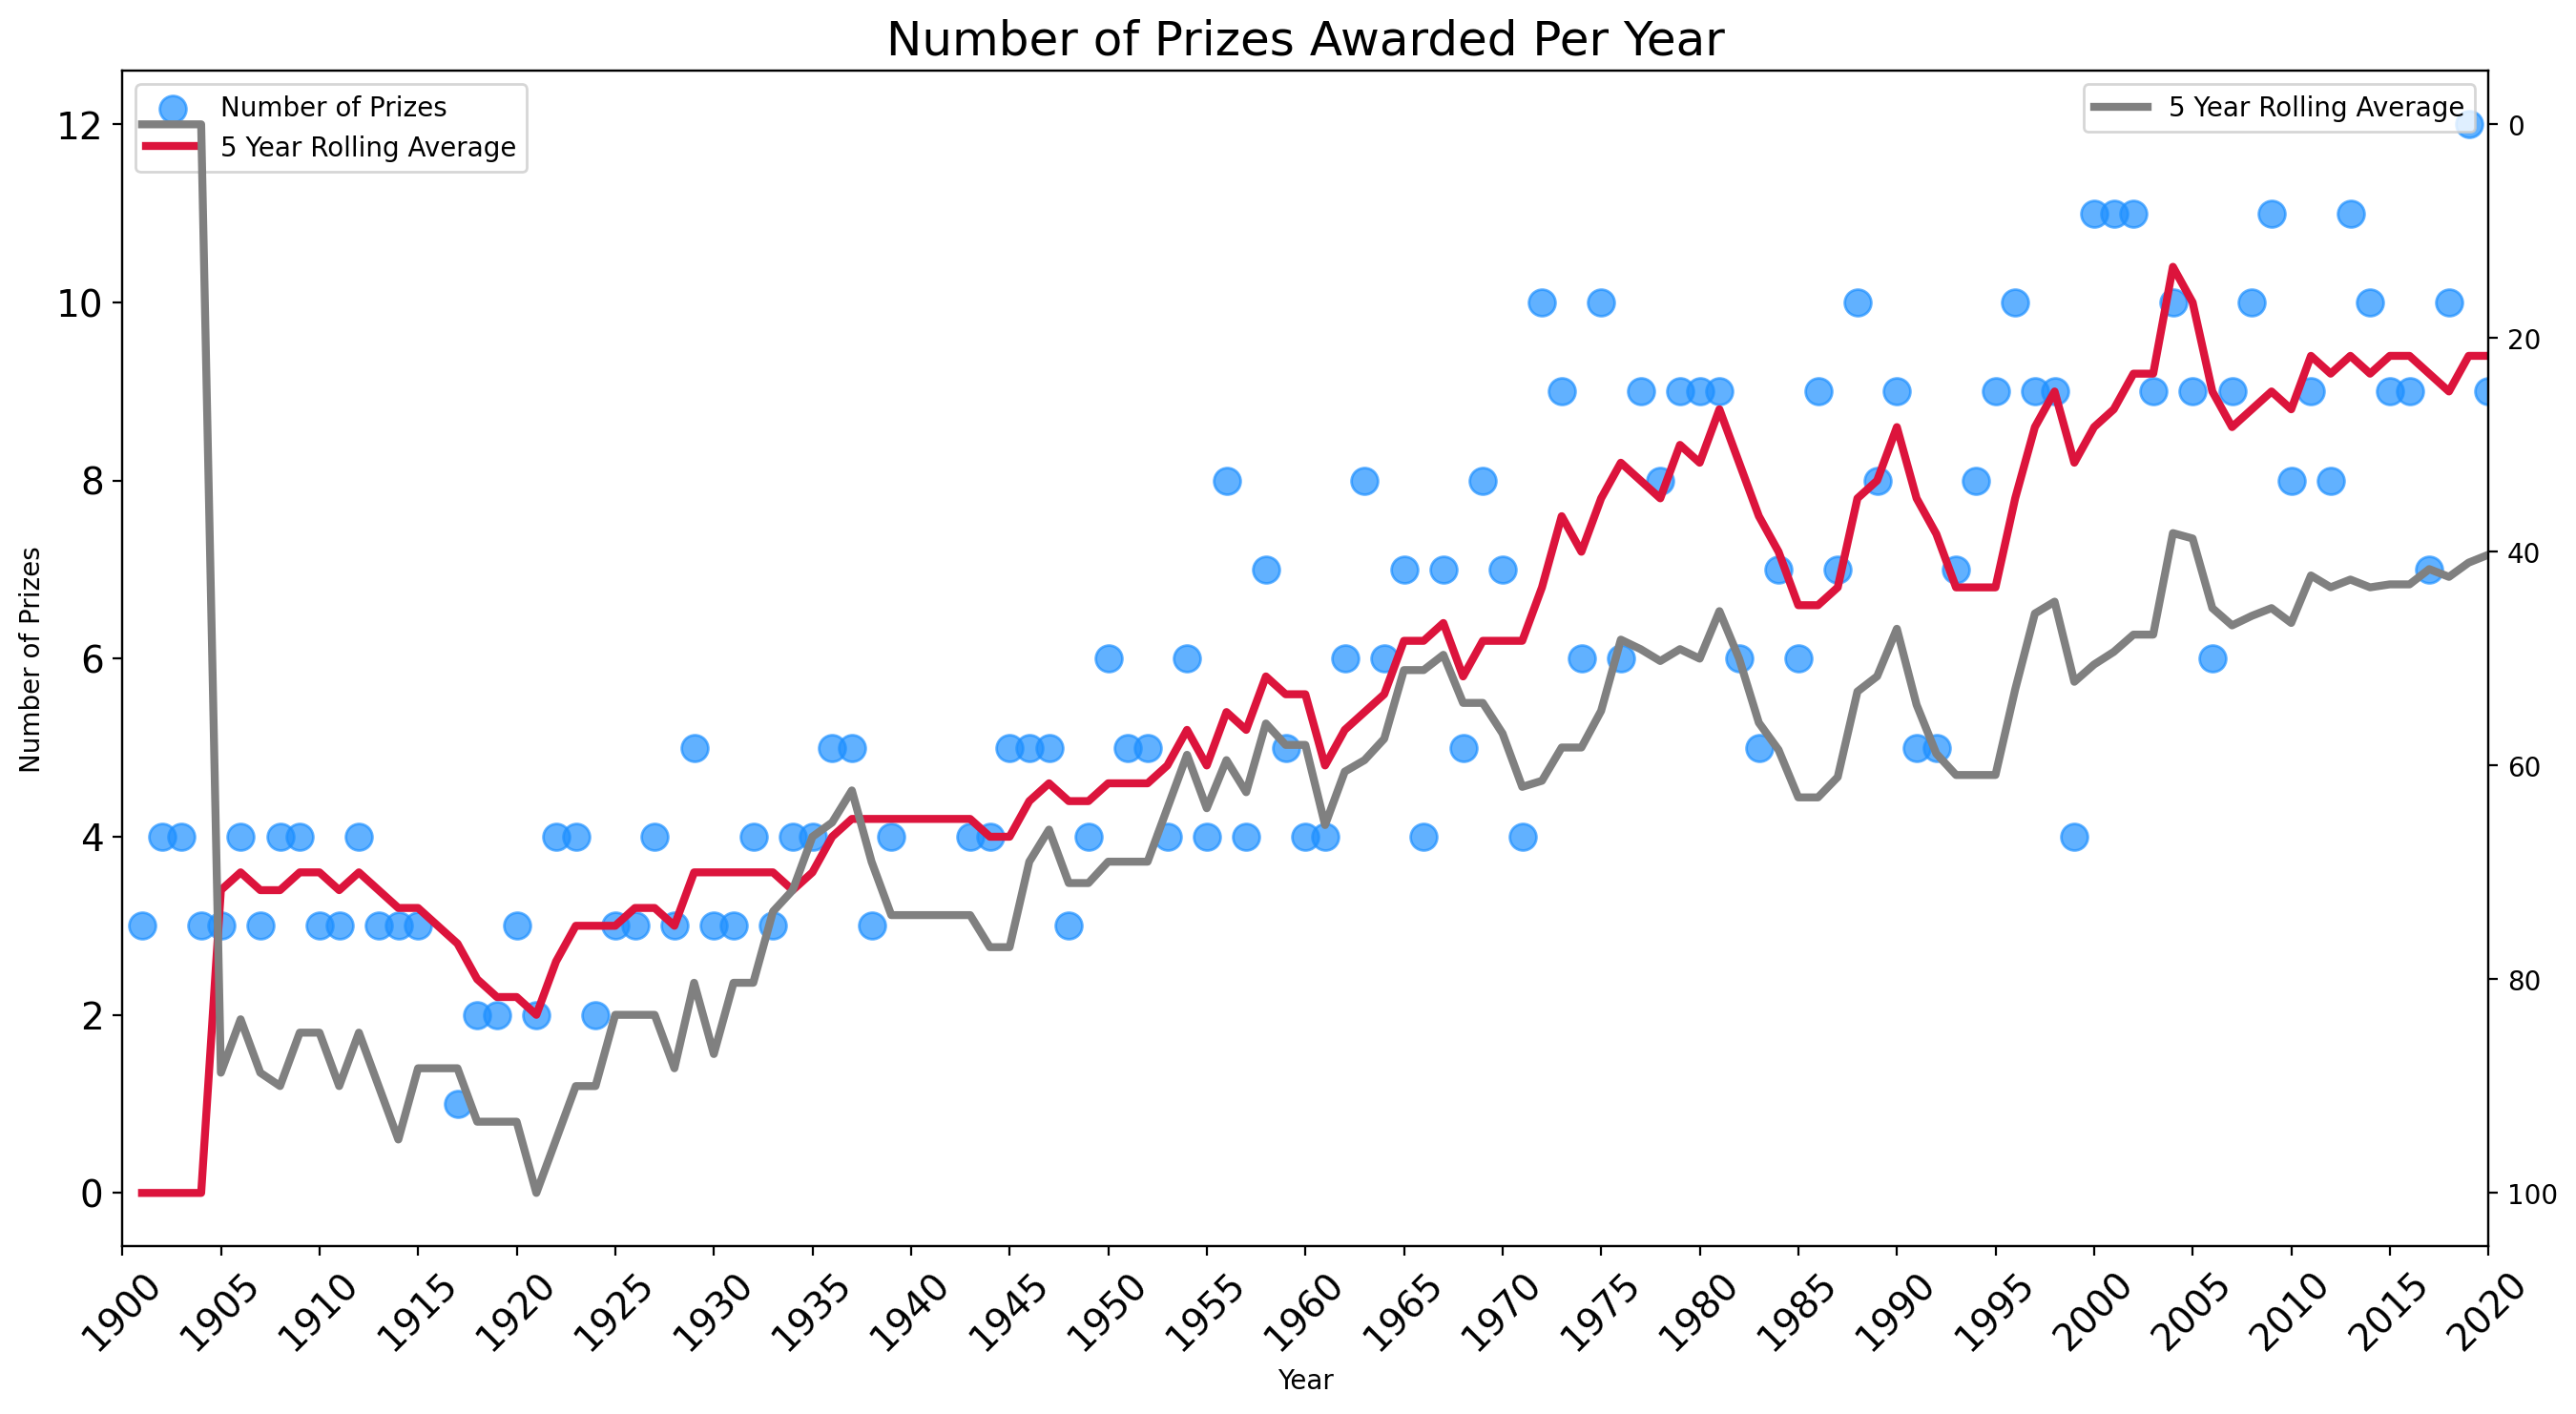

In [30]:
plt.figure(figsize=(16, 8), dpi=200)
plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Number of Prizes Awarded Per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(np.arange(1900, 2021, step=5),
           rotation=45,
           fontsize=14
           )
ax1=plt.gca()
ax2=ax1.twinx()
ax1.set_xlim(1900, 2020)
ax2.invert_yaxis()
ax1.scatter(x=prize_per_year['year'], y=prize_per_year['prize'], c='dodgerblue', alpha=0.7, s=100, label='Number of Prizes')
ax1.plot(prize_per_year['year'], prize_per_year['rolling_avg'], c='crimson', linewidth=3, label='5 Year Rolling Average')
ax2.plot(share_per_year['year'], share_per_year['rolling_avg'], c='grey', linewidth=3, label='5 Year Rolling Average')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [31]:
top20_countries=df_data_clean.groupby(['birth_country_current'], as_index=False).agg({'prize':pd.Series.count})
top20_countries.sort_values(by='prize', ascending=False, inplace=True)
top20_countries.head(20)

,birth_country_current,prize
51,United States of America,247
50,United Kingdom,86
18,Germany,70
17,France,36
25,Japan,23
39,Russia,19
36,Poland,18
9,Canada,17
45,Sweden,16
32,Netherlands,16


birth_country → where laureates were born (historical names)

birth_country_current → where they were born in today’s map (modern names) ← usually best for “top 20 countries”

✅ birth_country
Problems:

Uses historical country names (e.g., “Austro-Hungarian Empire,” “British India”) → confusing for modern audiences.

Countries that no longer exist → hard to compare fairly.

🌍 birth_country_current
Problems:

Reassigns people to modern countries they might never have identified with (e.g., someone born in pre-partition India now counted under India or Pakistan).

Political changes and border disputes → can be subjective.

🏢 organization_country
Problems:

Counts where the laureate worked → often biased toward richer countries (e.g., US, UK) because many laureates migrated.

Doesn't reflect the laureate’s origin or early education.

✅ Which is least problematic?
organization_country is often cleaner, because:

Modern names are consistent.

Less affected by historical border changes.

But: it shifts the story → shows where research was done, not where people come from.

In [32]:
fig = px.bar(
    top20_countries.head(20),
    x='prize',
    y='birth_country_current',
    orientation='h',
    title='Countries with the Most Nobel Prizes',
    color='prize',  # optional: remove for single color bars
    color_continuous_scale='Viridis'
)
fig.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Country',
    coloraxis_showscale=False  # hides color scale if using color
)
fig.show()


# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


In [33]:
df_countries=df_data_clean.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize':pd.Series.count})
df_countries.sort_values(by='prize', ascending=False, inplace=True)
fig=px.choropleth(df_countries, locations='ISO', color='prize', color_continuous_scale='matter', title='Number of Prizes Won by Country', hover_name='birth_country_current')
fig.update_layout(coloraxis_showscale=True)
fig.show()

# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [34]:
cat_countries=df_data_clean.groupby([ 'birth_country_current','category'], as_index=False).agg({'prize':pd.Series.count})
cat_countries.sort_values(by='prize', ascending=False, inplace=True)
cat_countries

,birth_country_current,category,prize
116,United States of America,Medicine,78
117,United States of America,Physics,68
114,United States of America,Chemistry,52
115,United States of America,Economics,49
110,United Kingdom,Chemistry,27
...,...,...,...
94,Slovakia,Physics,1
107,Turkey,Chemistry,1
108,Ukraine,Chemistry,1
106,Taiwan,Chemistry,1


In [35]:
merged_df = pd.merge(cat_countries, top20_countries, on='birth_country_current')
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', ascending=False, inplace=True)
merged_df=merged_df.head(20)
merged_df

,birth_country_current,category,cat_prize,total_prize
0,United States of America,Medicine,78,247
1,United States of America,Physics,68,247
2,United States of America,Chemistry,52,247
3,United States of America,Economics,49,247
4,United Kingdom,Chemistry,27,86
5,United Kingdom,Medicine,27,86
8,United Kingdom,Physics,24,86
16,United Kingdom,Economics,8,86
6,Germany,Chemistry,26,70
9,Germany,Medicine,18,70


In [36]:
fig=px.bar(x=merged_df.cat_prize, y=merged_df.birth_country_current, color=merged_df.category, orientation='h', title='Top 20 Countries by Number of Prizes and Category')
fig.update_layout(xaxis_title='Number of Prizes', yaxis_title='Country')
fig.show()

In [37]:
weak_categories = (
    merged_df[merged_df['birth_country_current'].isin(['United States of America', 'Germany', 'Japan'])]
    .groupby(['category', 'birth_country_current'], as_index=False)['total_prize'].sum()
)

# Pivot to see side by side
pivot = weak_categories.pivot(index='category', columns='birth_country_current', values='total_prize').fillna(0)

# Compute difference vs USA
pivot['diff_vs_USA'] = pivot['United States of America'] - (pivot['Germany'] + pivot['Japan'])

# Find category where US has the biggest lead over Germany+Japan
pivot.head()


birth_country_current,Germany,Japan,United States of America,diff_vs_USA
category,,,,
Chemistry,70.00,23.00,247.00,154.00
Economics,70.00,0.00,247.00,177.00
Medicine,70.00,23.00,247.00,154.00
Physics,70.00,23.00,247.00,154.00


In [38]:
weakest_category = pivot.sort_values(by='diff_vs_USA', ascending=False).index[0]

print('Category in which Germany and Japan are the weakest compared to the United States:')
print(weakest_category)

Category in which Germany and Japan are the weakest compared to the United States:
Economics


In [39]:
# Directly group your clean DataFrame by category and birth_country_current
df_compare = df_data_clean[df_data_clean['birth_country_current'].isin(['Germany', 'United Kingdom'])]

# Count prizes per category
cat_counts = df_compare.groupby(['category', 'birth_country_current'], as_index=False).size()

cat_counts

,category,birth_country_current,size
0,Chemistry,Germany,26
1,Chemistry,United Kingdom,27
2,Economics,Germany,1
3,Economics,United Kingdom,8
4,Medicine,Germany,18
5,Medicine,United Kingdom,27
6,Physics,Germany,25
7,Physics,United Kingdom,24


In [40]:
pivot = cat_counts.pivot(index='category', columns='birth_country_current', values='size').fillna(0)

print(pivot)

birth_country_current  Germany  United Kingdom
category                                      
Chemistry                   26              27
Economics                    1               8
Medicine                    18              27
Physics                     25              24


In [41]:
# Find categories where Germany > UK
better_cats = pivot[pivot['Germany'] > pivot['United Kingdom']]
better_cats.head()

birth_country_current,Germany,United Kingdom
category,,
Physics,25,24


In [42]:
print('Category/categories in which Germany has more prizes than the UK:')
print(better_cats.index.tolist())

Category/categories in which Germany has more prizes than the UK:
['Physics']


In [50]:
print("The category that makes up most of Australia's nobel prizes is/ are:")
print(df_data_clean[df_data_clean['birth_country_current'] == 'Australia']['category'].value_counts().index[0])

The category that makes up most of Australia's nobel prizes is/ are:
Medicine


In [51]:
print("The category that makes up half of the prizes in the Netherlands is/ are:")
print(df_data_clean[df_data_clean['birth_country_current'] == 'Netherlands']['category'].value_counts().index[0])


The category that makes up half of the prizes in the Netherlands is/ are:
Physics


In [54]:
print("Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?")
usa='United States of America'
france='France'

categories=['Economics', 'Physics', 'Medicine']

for cat in categories:
  usa_count=df_data_clean[(df_data_clean['birth_country_current'] == usa) & (df_data_clean['category'] == cat)].shape[0]
  france_count=df_data_clean[(df_data_clean['birth_country_current'] == france) & (df_data_clean['category'] == cat)].shape[0]
  print(f"\nCategory: {cat}")
  print(f"USA: {usa_count} prizes")
  print(f"France: {france_count} prizes")
  if usa_count > france_count:
    print("USA has more prizes than France in this category.")
  elif usa_count < france_count:
    print("France has more prizes than USA in this category.")
  else:
    print("USA and France have the same number of prizes in this category.")

Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?

Category: Economics
USA: 49 prizes
France: 4 prizes
USA has more prizes than France in this category.

Category: Physics
USA: 68 prizes
France: 10 prizes
USA has more prizes than France in this category.

Category: Medicine
USA: 78 prizes
France: 12 prizes
USA has more prizes than France in this category.


### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [43]:
prize_by_year=df_data_clean.groupby(['birth_country_current', 'year'], as_index=False).count()
prize_by_year=prize_by_year.sort_values(by='year')[['year', 'birth_country_current', 'prize']]
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes.head()

,birth_country_current,year,prize
0,Algeria,1997,1
1,Argentina,1947,1
2,Argentina,1984,2
3,Australia,1915,1
4,Australia,1945,2


In [44]:
fig=px.line(cumulative_prizes, x='year', y='prize', color='birth_country_current', title='Cumulative Number of Prizes Won by Each Country Over Time', hover_name='birth_country_current')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Prizes')
fig.show()

In [45]:

top_by_year=cumulative_prizes.loc[cumulative_prizes.groupby('year')['prize'].idxmax()]
us_lead_year=top_by_year.loc[top_by_year['birth_country_current'] == 'United States of America', 'year'].min()
print(f"The United States eclipsed every other country in cumulative prizes in the year: {us_lead_year}")

The United States eclipsed every other country in cumulative prizes in the year: 1934


In [46]:
leading_before_us=top_by_year[top_by_year['year']<us_lead_year]
previous_leaders=leading_before_us['birth_country_current'].unique()
print(f"The countries that were leading previously are: {leading_before_us}")

The countries that were leading previously are:     birth_country_current  year  prize
103               Germany  1901      1
218           Netherlands  1902      3
76                 France  1903      2
319        United Kingdom  1904      2
105               Germany  1905      4
77                 France  1906      3
106               Germany  1907      5
245                Poland  1908      3
107               Germany  1909      6
108               Germany  1910      7
246                Poland  1911      4
79                 France  1912      7
80                 France  1913      9
109               Germany  1914      8
110               Germany  1915      9
322        United Kingdom  1917      5
111               Germany  1918     10
112               Germany  1919     11
113               Germany  1920     12
114               Germany  1921     13
115               Germany  1922     14
325        United Kingdom  1923      9
290                Sweden  1924      4
116             

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [56]:
top_20_organziations=df_data_clean.groupby(['organization_name'], as_index=False).agg({'prize':pd.Series.count})
top_20_organziations.sort_values(by='prize', ascending=False, inplace=True)
top_20_organziations.head(20)

,organization_name,prize
194,University of California,40
68,Harvard University,28
166,Stanford University,23
116,Massachusetts Institute of Technology (MIT),21
196,University of Chicago,20
195,University of Cambridge,18
38,Columbia University,16
26,California Institute of Technology (Caltech),16
145,Princeton University,15
118,Max-Planck-Institut,13


In [57]:
fig=px.bar(top_20_organziations.head(20), x='prize', y='organization_name', orientation='h', title='Top 20 Research Organisations', color_continuous_scale=px.colors.sequential.haline, color='prize')
fig.update_layout(xaxis_title='Number of Prizes', yaxis_title='Institution', coloraxis_showscale=False)
fig.show()

In [66]:
print("How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?")
chicago_count=df_data_clean[(df_data_clean['organization_name']=='University of Chicago')].shape[0]
harvard_count=df_data_clean[(df_data_clean['organization_name']=='Harvard University')].shape[0]
print(f"University of Chicago: {chicago_count} prize winners")
print(f"Harvard University: {harvard_count} prize winners")

How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?
University of Chicago: 20 prize winners
Harvard University: 28 prize winners


# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [67]:
top_20_organziations_cities=df_data_clean.groupby(['organization_city'], as_index=False).agg({'prize':pd.Series.count})
top_20_organziations_cities.sort_values(by='prize', ascending=False, inplace=True)
top_20_organziations_cities.head(20)

,organization_city,prize
33,"Cambridge, MA",49
119,"New York, NY",44
32,Cambridge,31
90,London,27
126,Paris,24
153,"Stanford, CA",24
12,"Berkeley, CA",21
38,"Chicago, IL",20
132,"Princeton, NJ",19
127,"Pasadena, CA",16


In [68]:
fig=px.bar(top_20_organziations_cities.head(20), x='prize', y='organization_city', orientation='h', color='prize', color_continuous_scale=px.colors.sequential.Plasma, title='Which Cities Make the Most Discoveries?')
fig.update_layout(xaxis_title='Number of Prizes', yaxis_title='City', coloraxis_showscale=False)
fig.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [69]:
top_20_cities=df_data_clean.groupby(['birth_city'], as_index=False).agg({'prize':pd.Series.count})
top_20_cities.sort_values(by='prize', ascending=False, inplace=True)
top_20_cities.head(20)

,birth_city,prize
278,"New York, NY",50
230,London,15
306,Paris,15
419,Vienna,12
83,"Chicago, IL",12
46,"Boston, MA",8
56,"Brooklyn, NY",8
266,Munich,7
58,Budapest,7
431,"Washington, DC",7


In [70]:
fig=px.bar(top_20_cities.head(20), x='prize', y='birth_city', orientation='h', color='prize', color_continuous_scale=px.colors.sequential.Plasma, title='Where are Nobel Laureates Born?')
fig.update_layout(xaxis_title='Number of Prizes', yaxis_title='City', coloraxis_showscale=False)
fig.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [74]:
df_req_sunburst=df_data_clean.groupby(['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize':'count'})
df_req_sunburst.sort_values(by='prize', ascending=False, inplace=True)
df_req_sunburst.head()

,organization_country,organization_city,organization_name,prize
204,United States of America,"Cambridge, MA",Harvard University,28
279,United States of America,"Stanford, CA",Stanford University,23
205,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
208,United States of America,"Chicago, IL",University of Chicago,20
194,United States of America,"Berkeley, CA",University of California,19


In [75]:
fig=px.sunburst(df_req_sunburst, path=['organization_country', 'organization_city', 'organization_name'], values='prize', title='Where do Discoveries Take Place?')
fig.update_layout(coloraxis_showscale=False, xaxis_title='Number Of Prizes', yaxis_title='City')
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



In [77]:
df_data_clean['winning_age']=df_data_clean['year']-df_data_clean['birth_date'].dt.year
df_data_clean.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,year_date,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1901-01-01,100.00,49
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1901-01-01,100.00,47
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU,1901-01-01,100.00,56
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Germany,Male,Berlin University,Berlin,Germany,DEU,1902-01-01,100.00,50
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,Individual,Ronald Ross,1857-05-13,Almora,India,India,Male,University College London,Liverpool,United Kingdom,IND,1902-01-01,100.00,45


### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [81]:
print(f"The names of the youngest nobel lauerate is: {df_data_clean.sort_values(by='winning_age', ascending=True).head(1)['full_name'].values[0]} \n")

The names of the youngest nobel lauerate is: William Lawrence Bragg 



In [82]:
print(f"The names of the oldest nobel lauerate is: {df_data_clean.sort_values(by='winning_age', ascending=False).head(1)['full_name'].values[0]} \n")

The names of the oldest nobel lauerate is: John Goodenough 



In [84]:
print(f"The average age of a winner is: {df_data_clean['winning_age'].mean():.2f} \n")

The average age of a winner is: 58.81 



In [85]:
print(f"75% of laureates are younger than {df_data_clean['winning_age'].quantile(0.75):.2f} when they receive the prize \n")

75% of laureates are younger than 68.00 when they receive the prize 



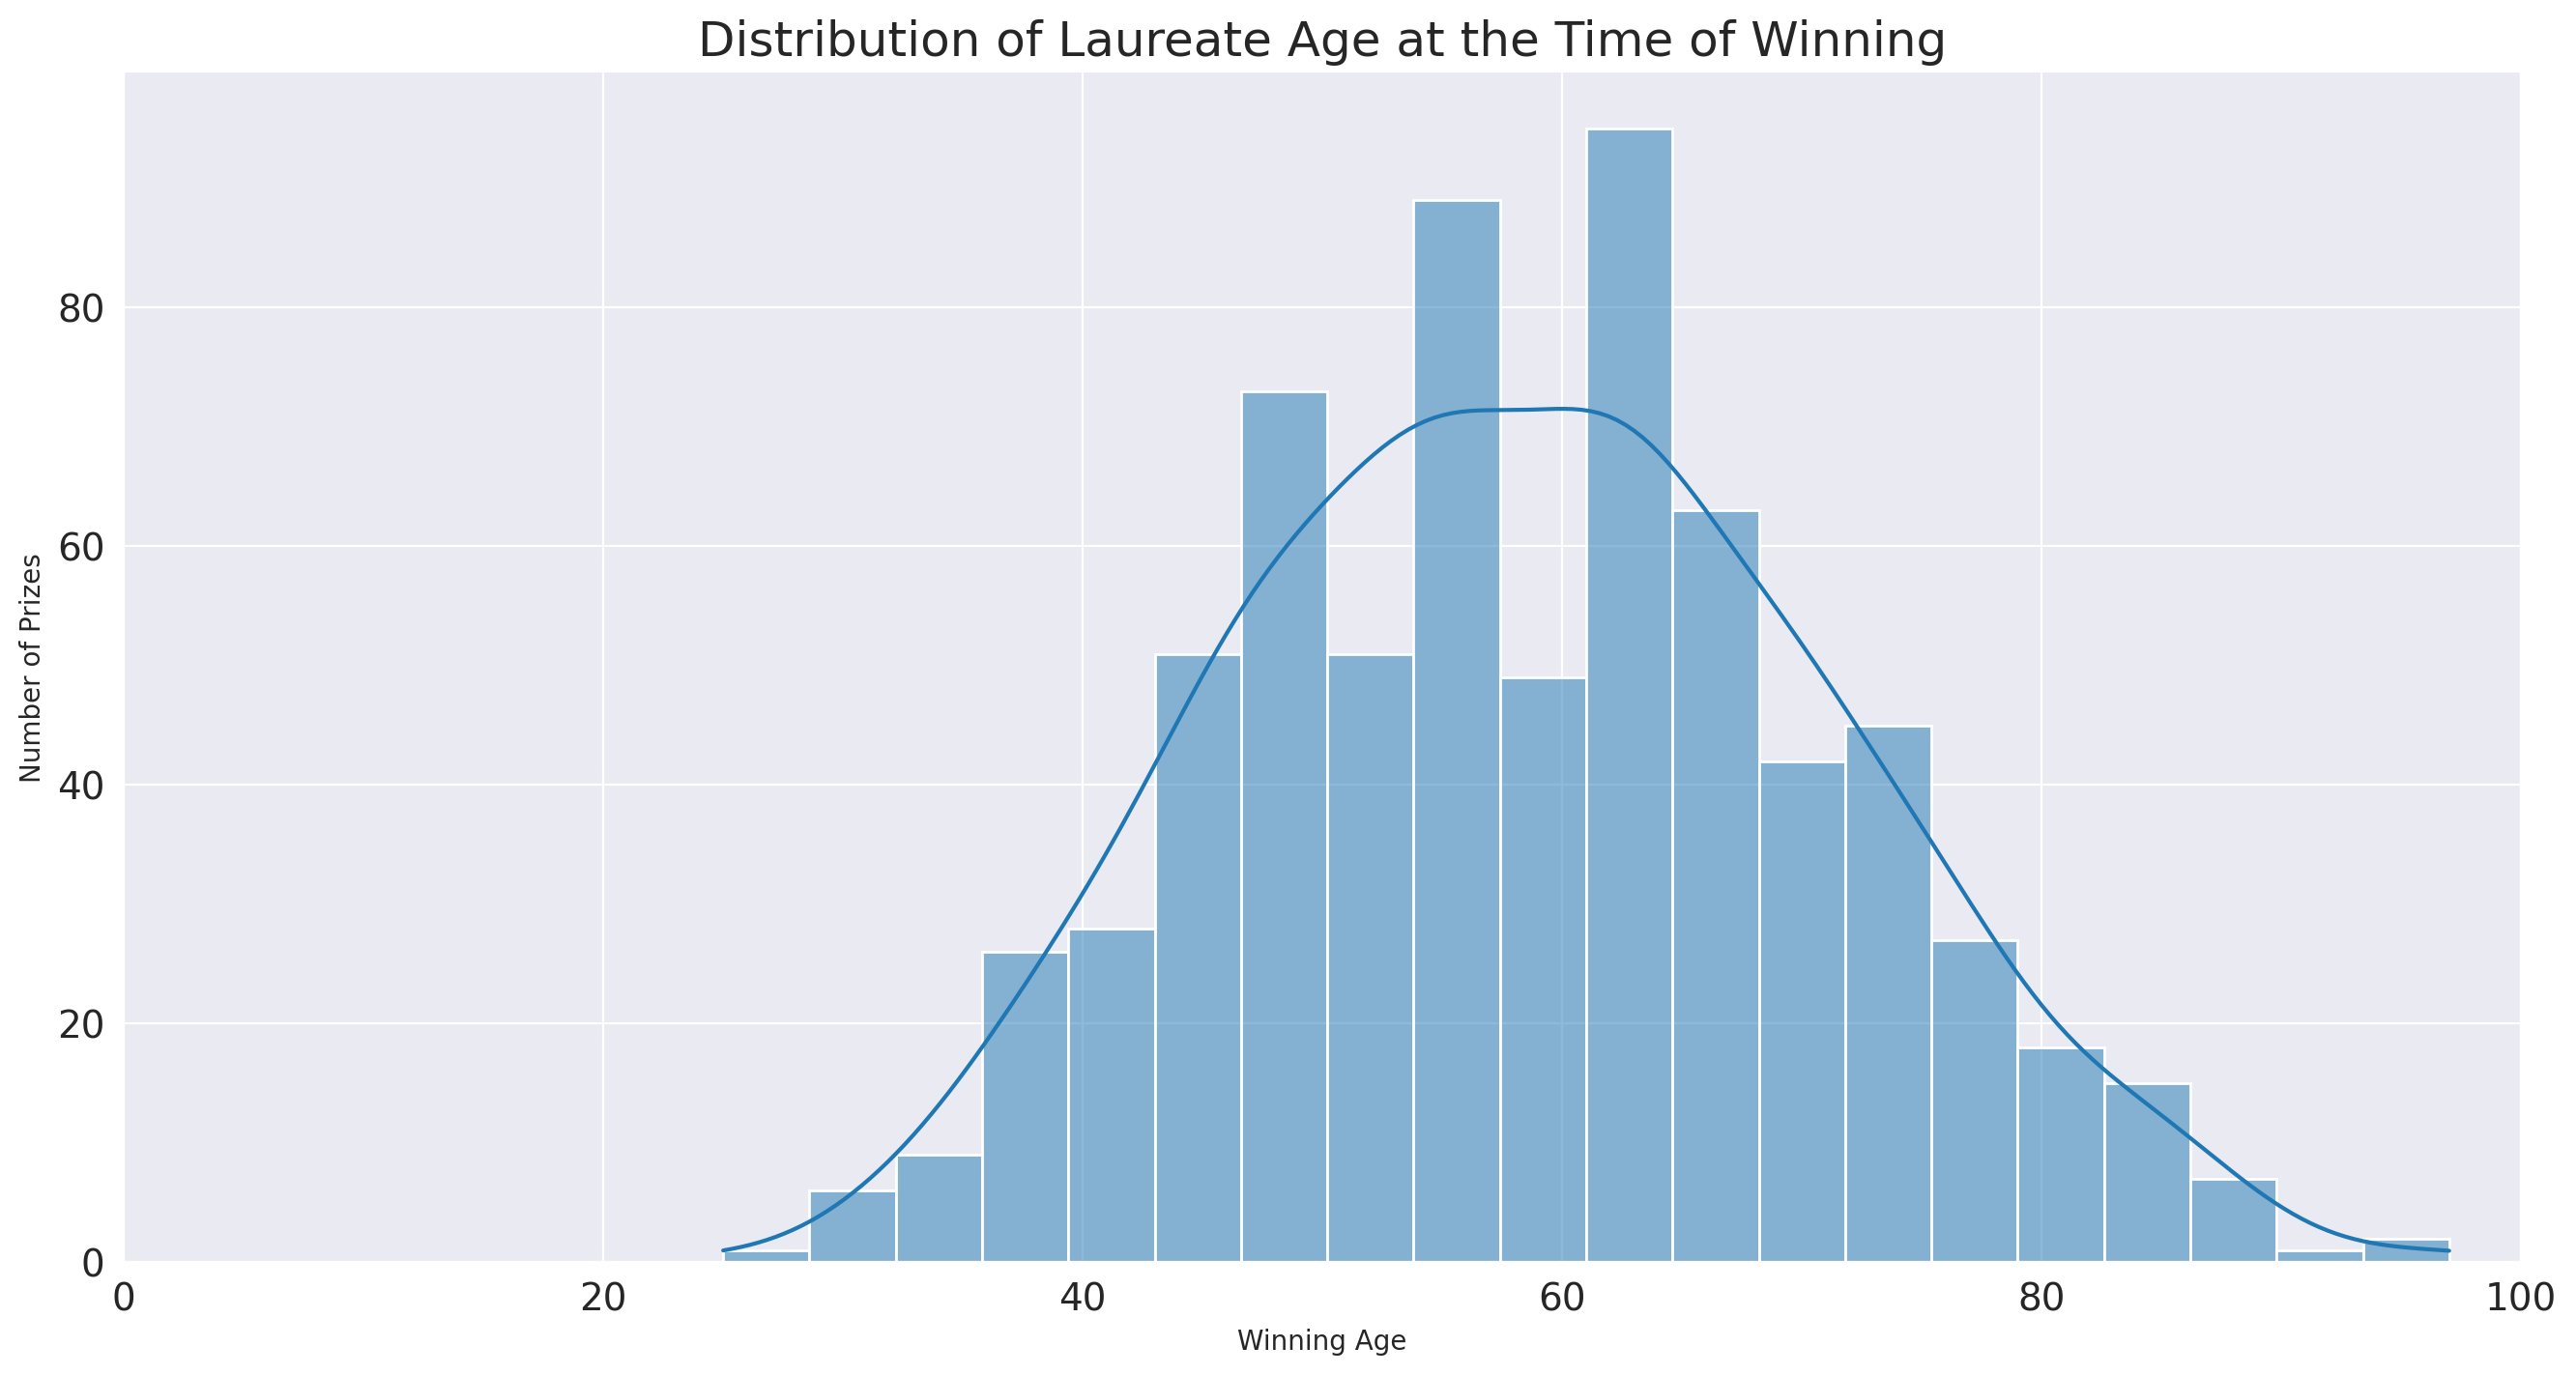

In [86]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(16, 8), dpi=200)
plt.xlabel('Winning Age')
plt.ylabel('Number of Prizes')
plt.title('Distribution of Laureate Age at the Time of Winning', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax=plt.gca()
ax.set_xlim(0, 100)
sns.histplot(data=df_data_clean, x='winning_age', bins=20, kde=True)
plt.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [87]:
df_data_clean['winning_age'].describe()

,winning_age
count,698.00
mean,58.81
std,12.56
min,25.00
25%,49.25
50%,58.50
75%,68.00
max,97.00


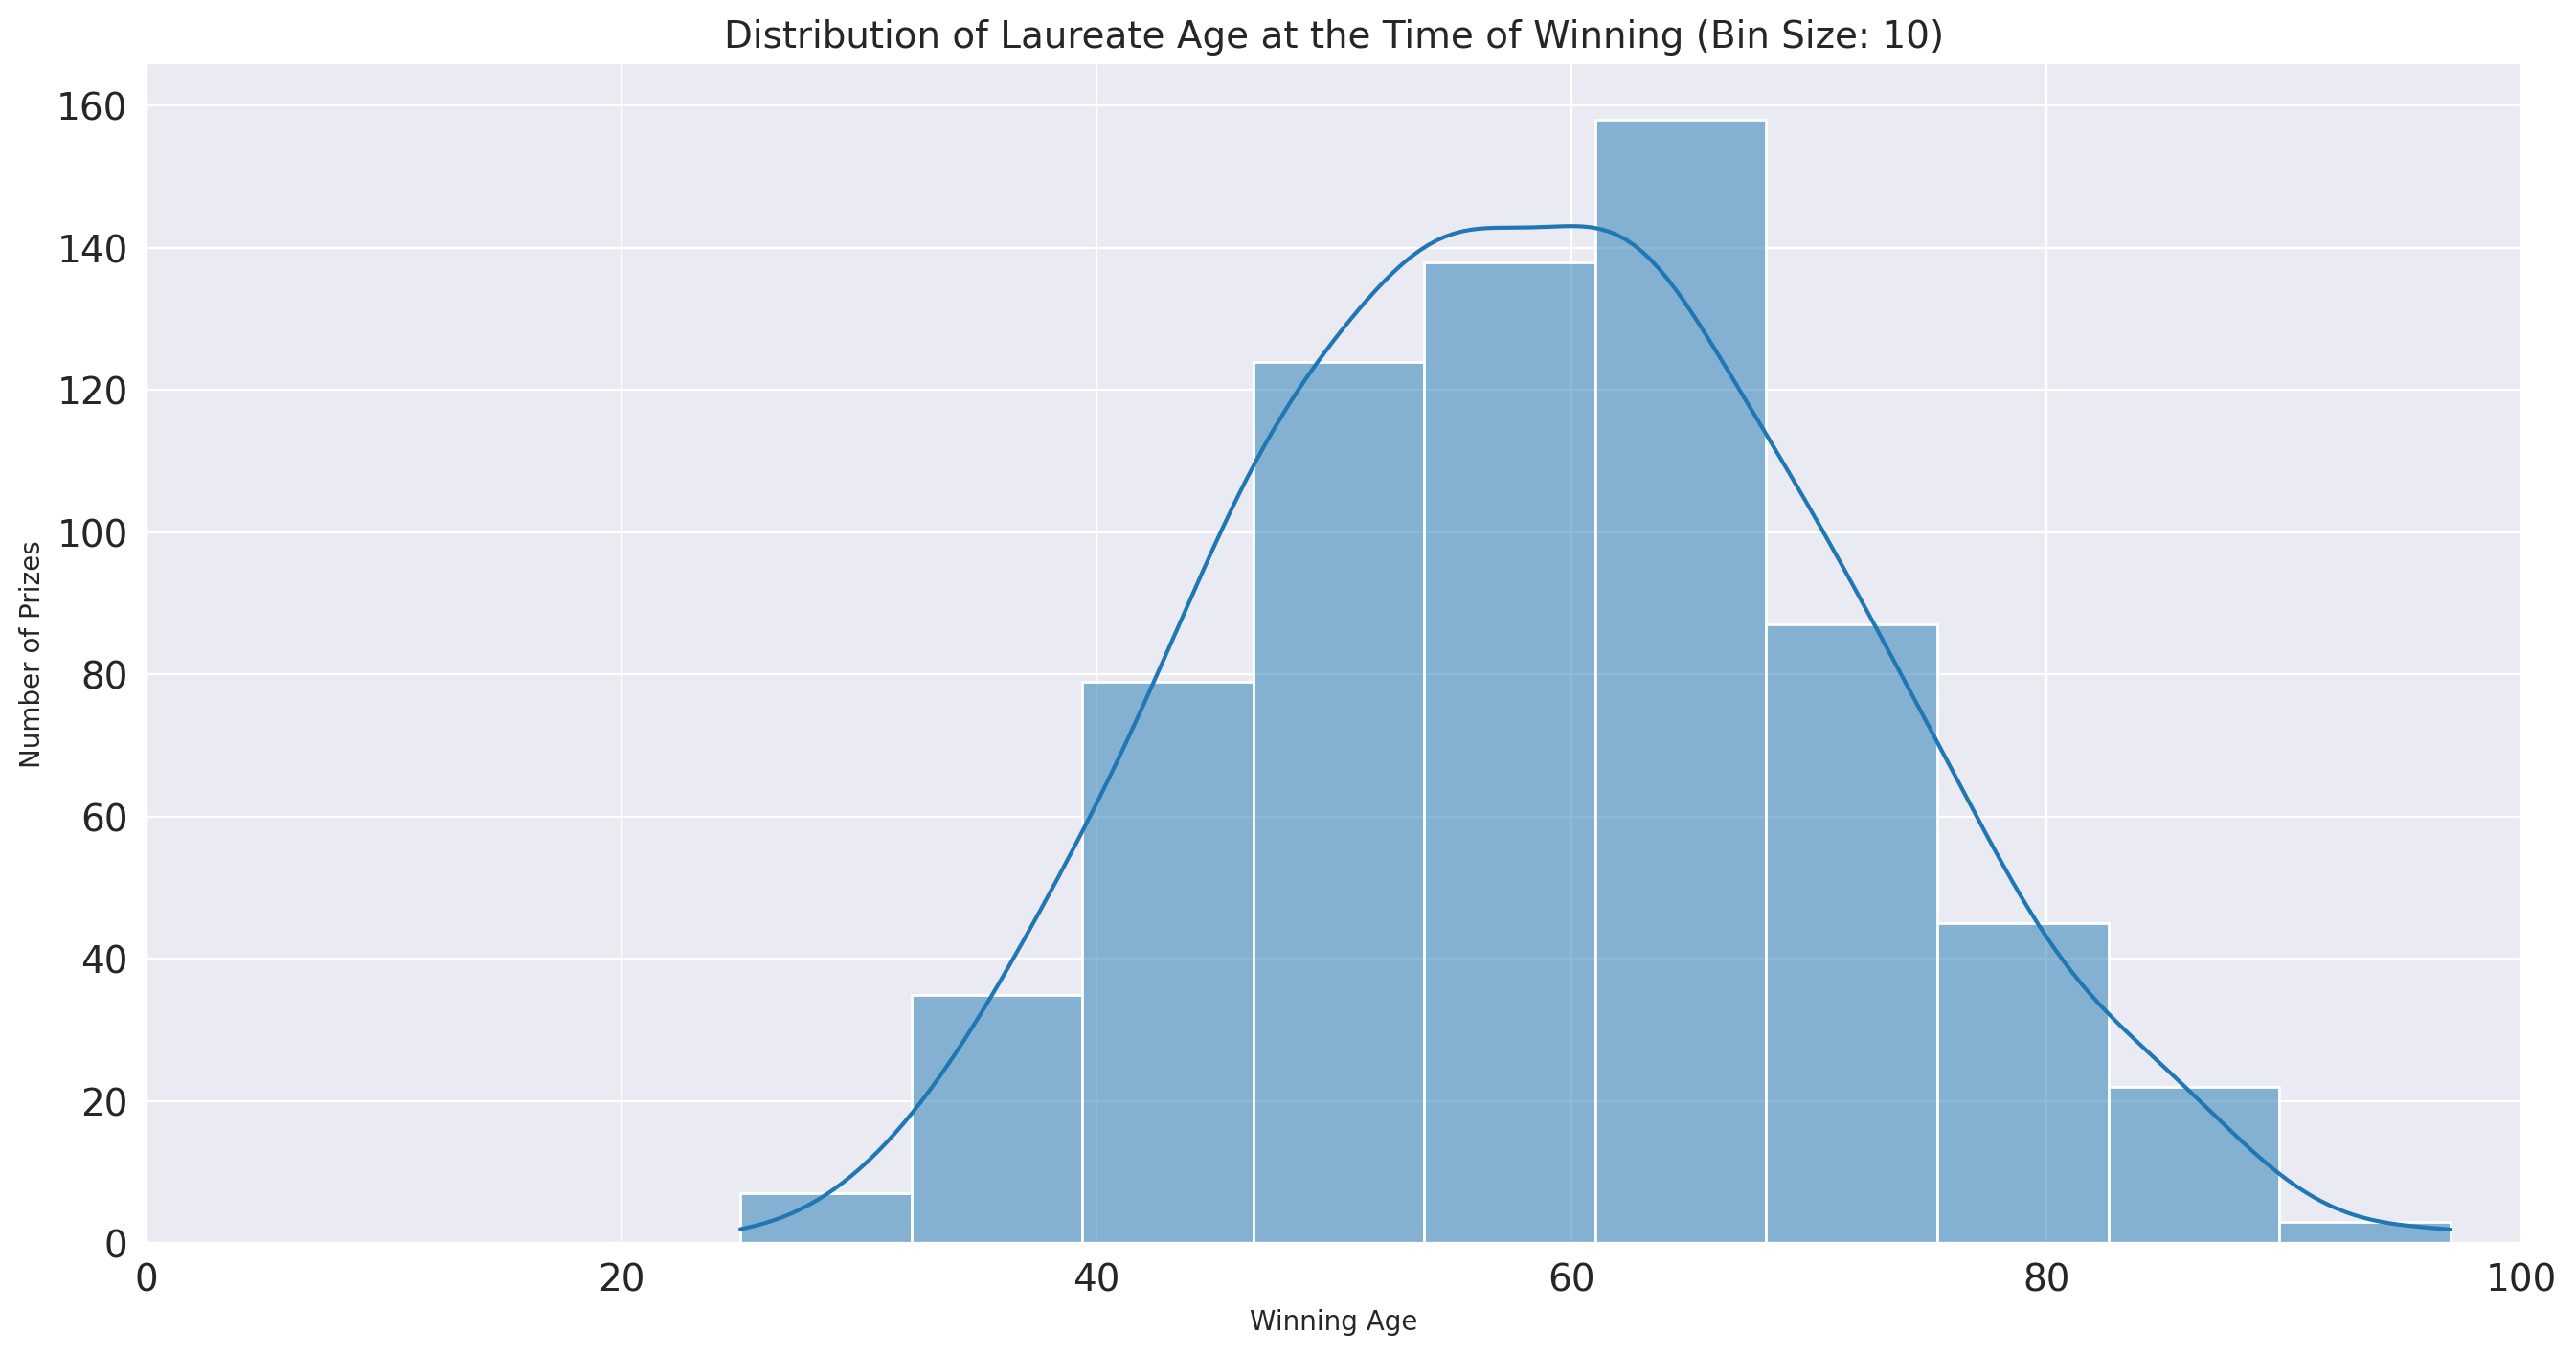

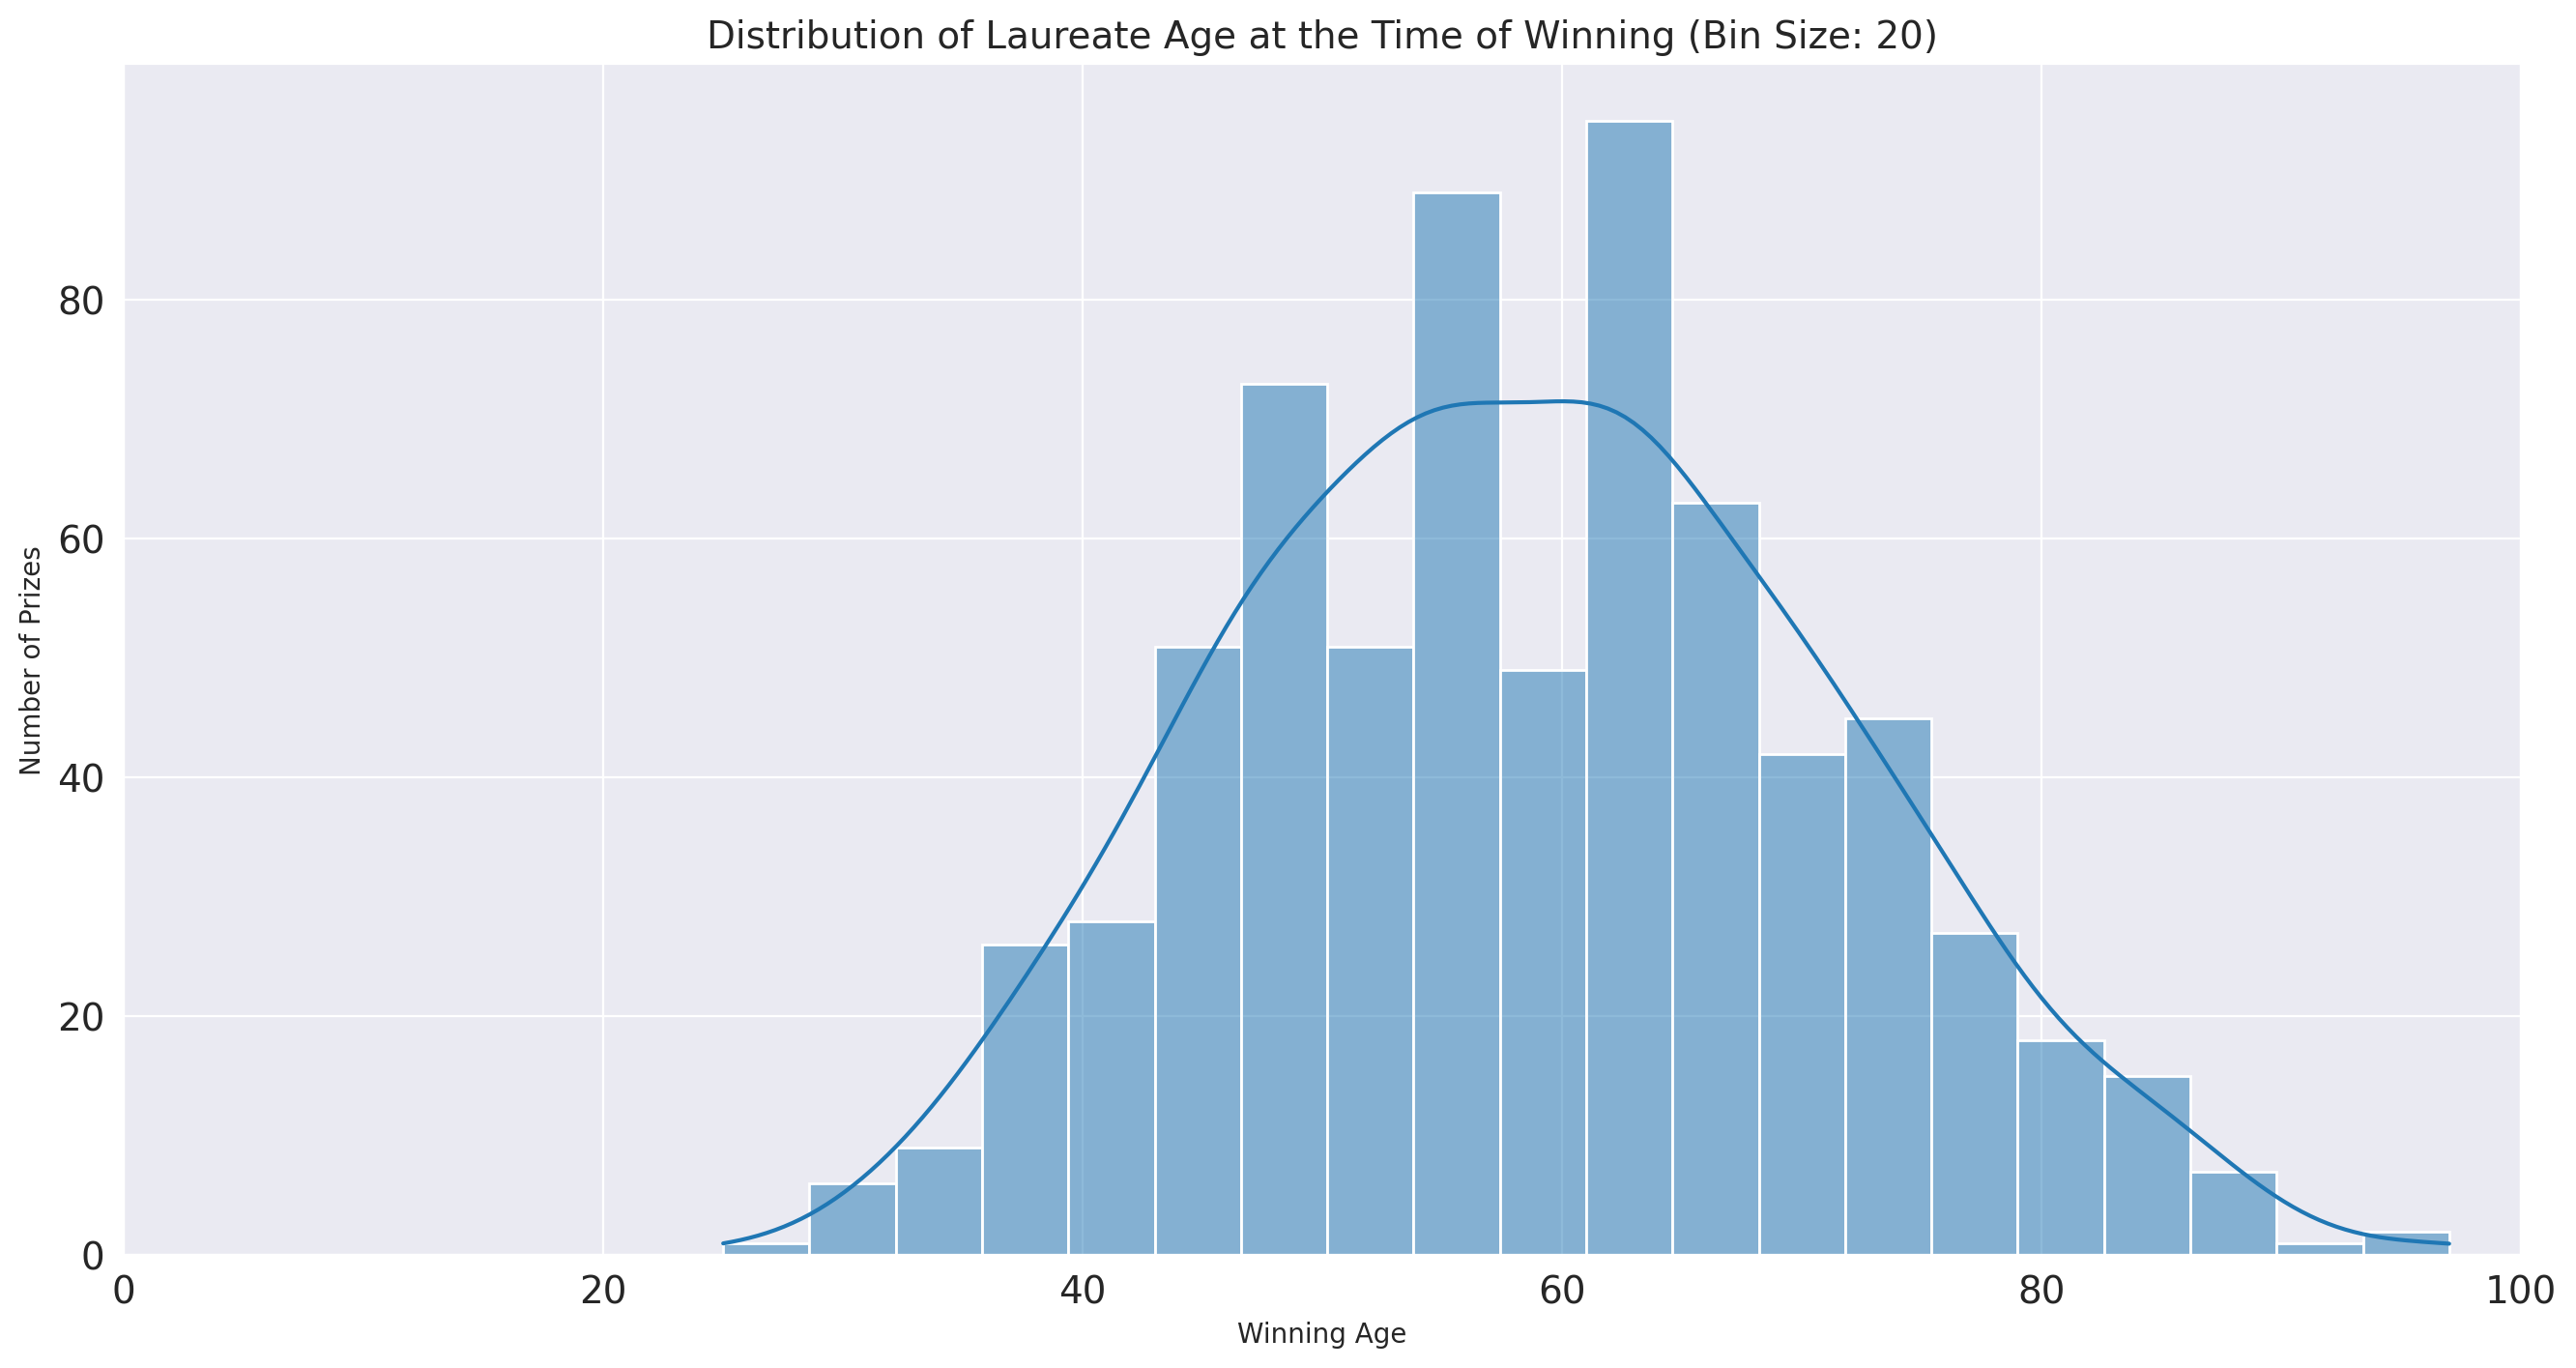

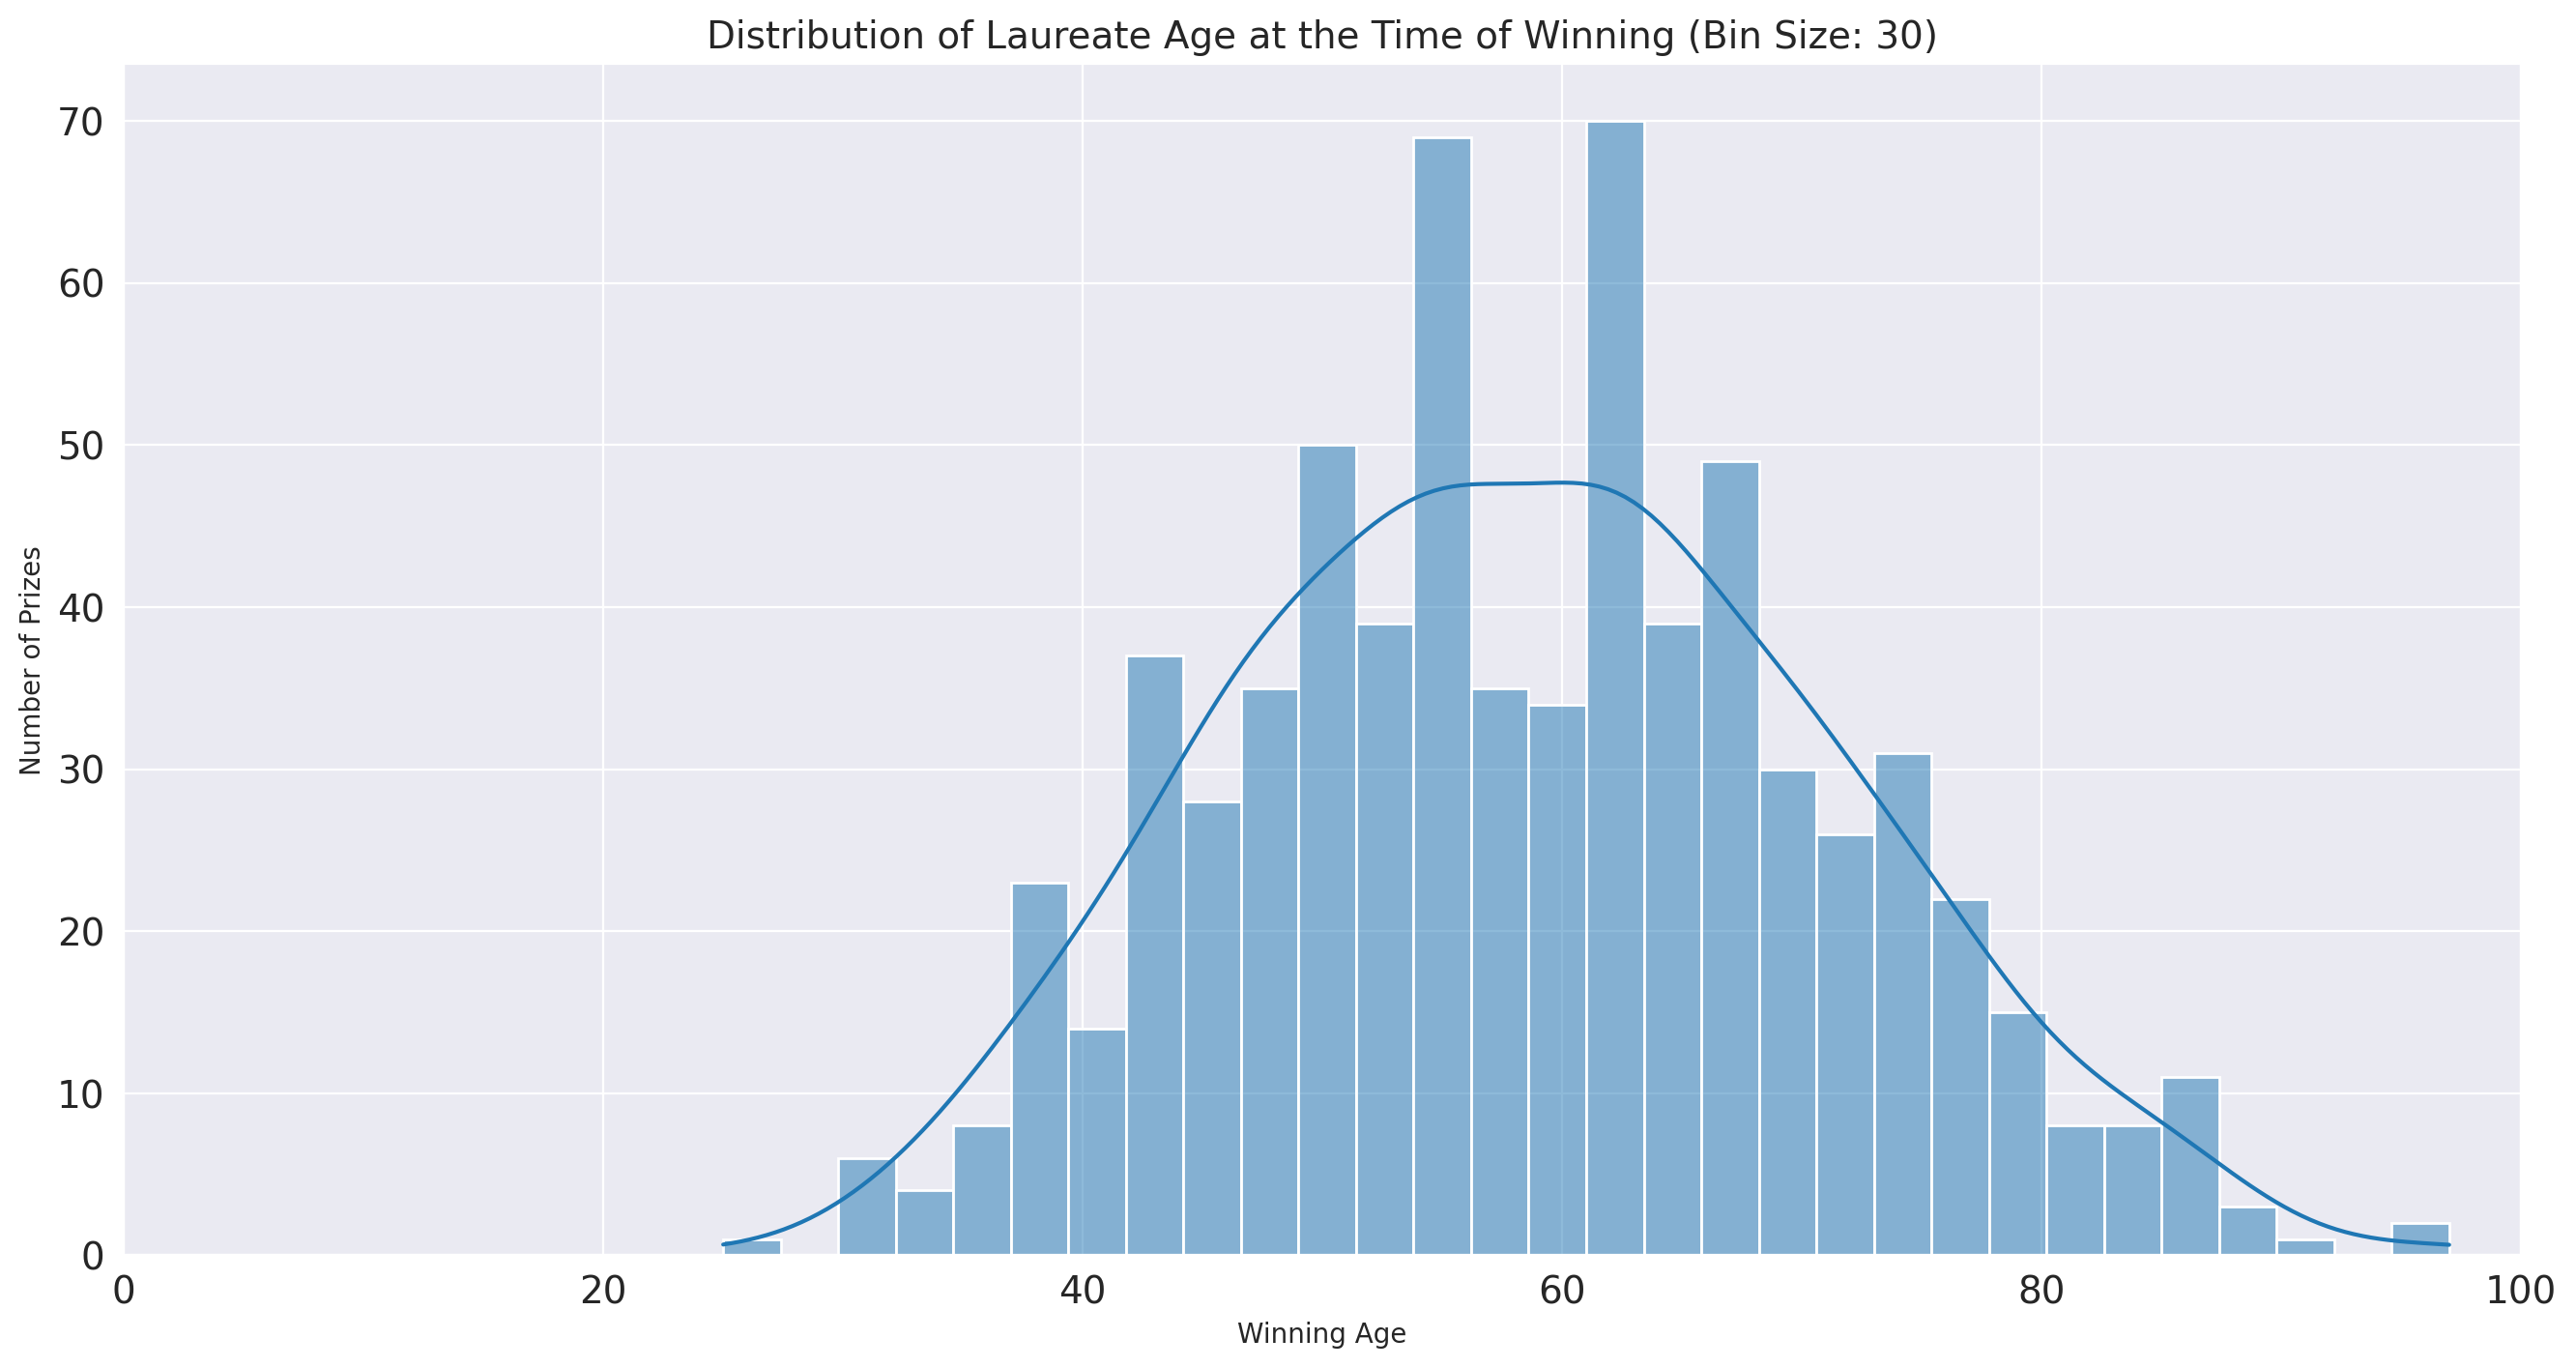

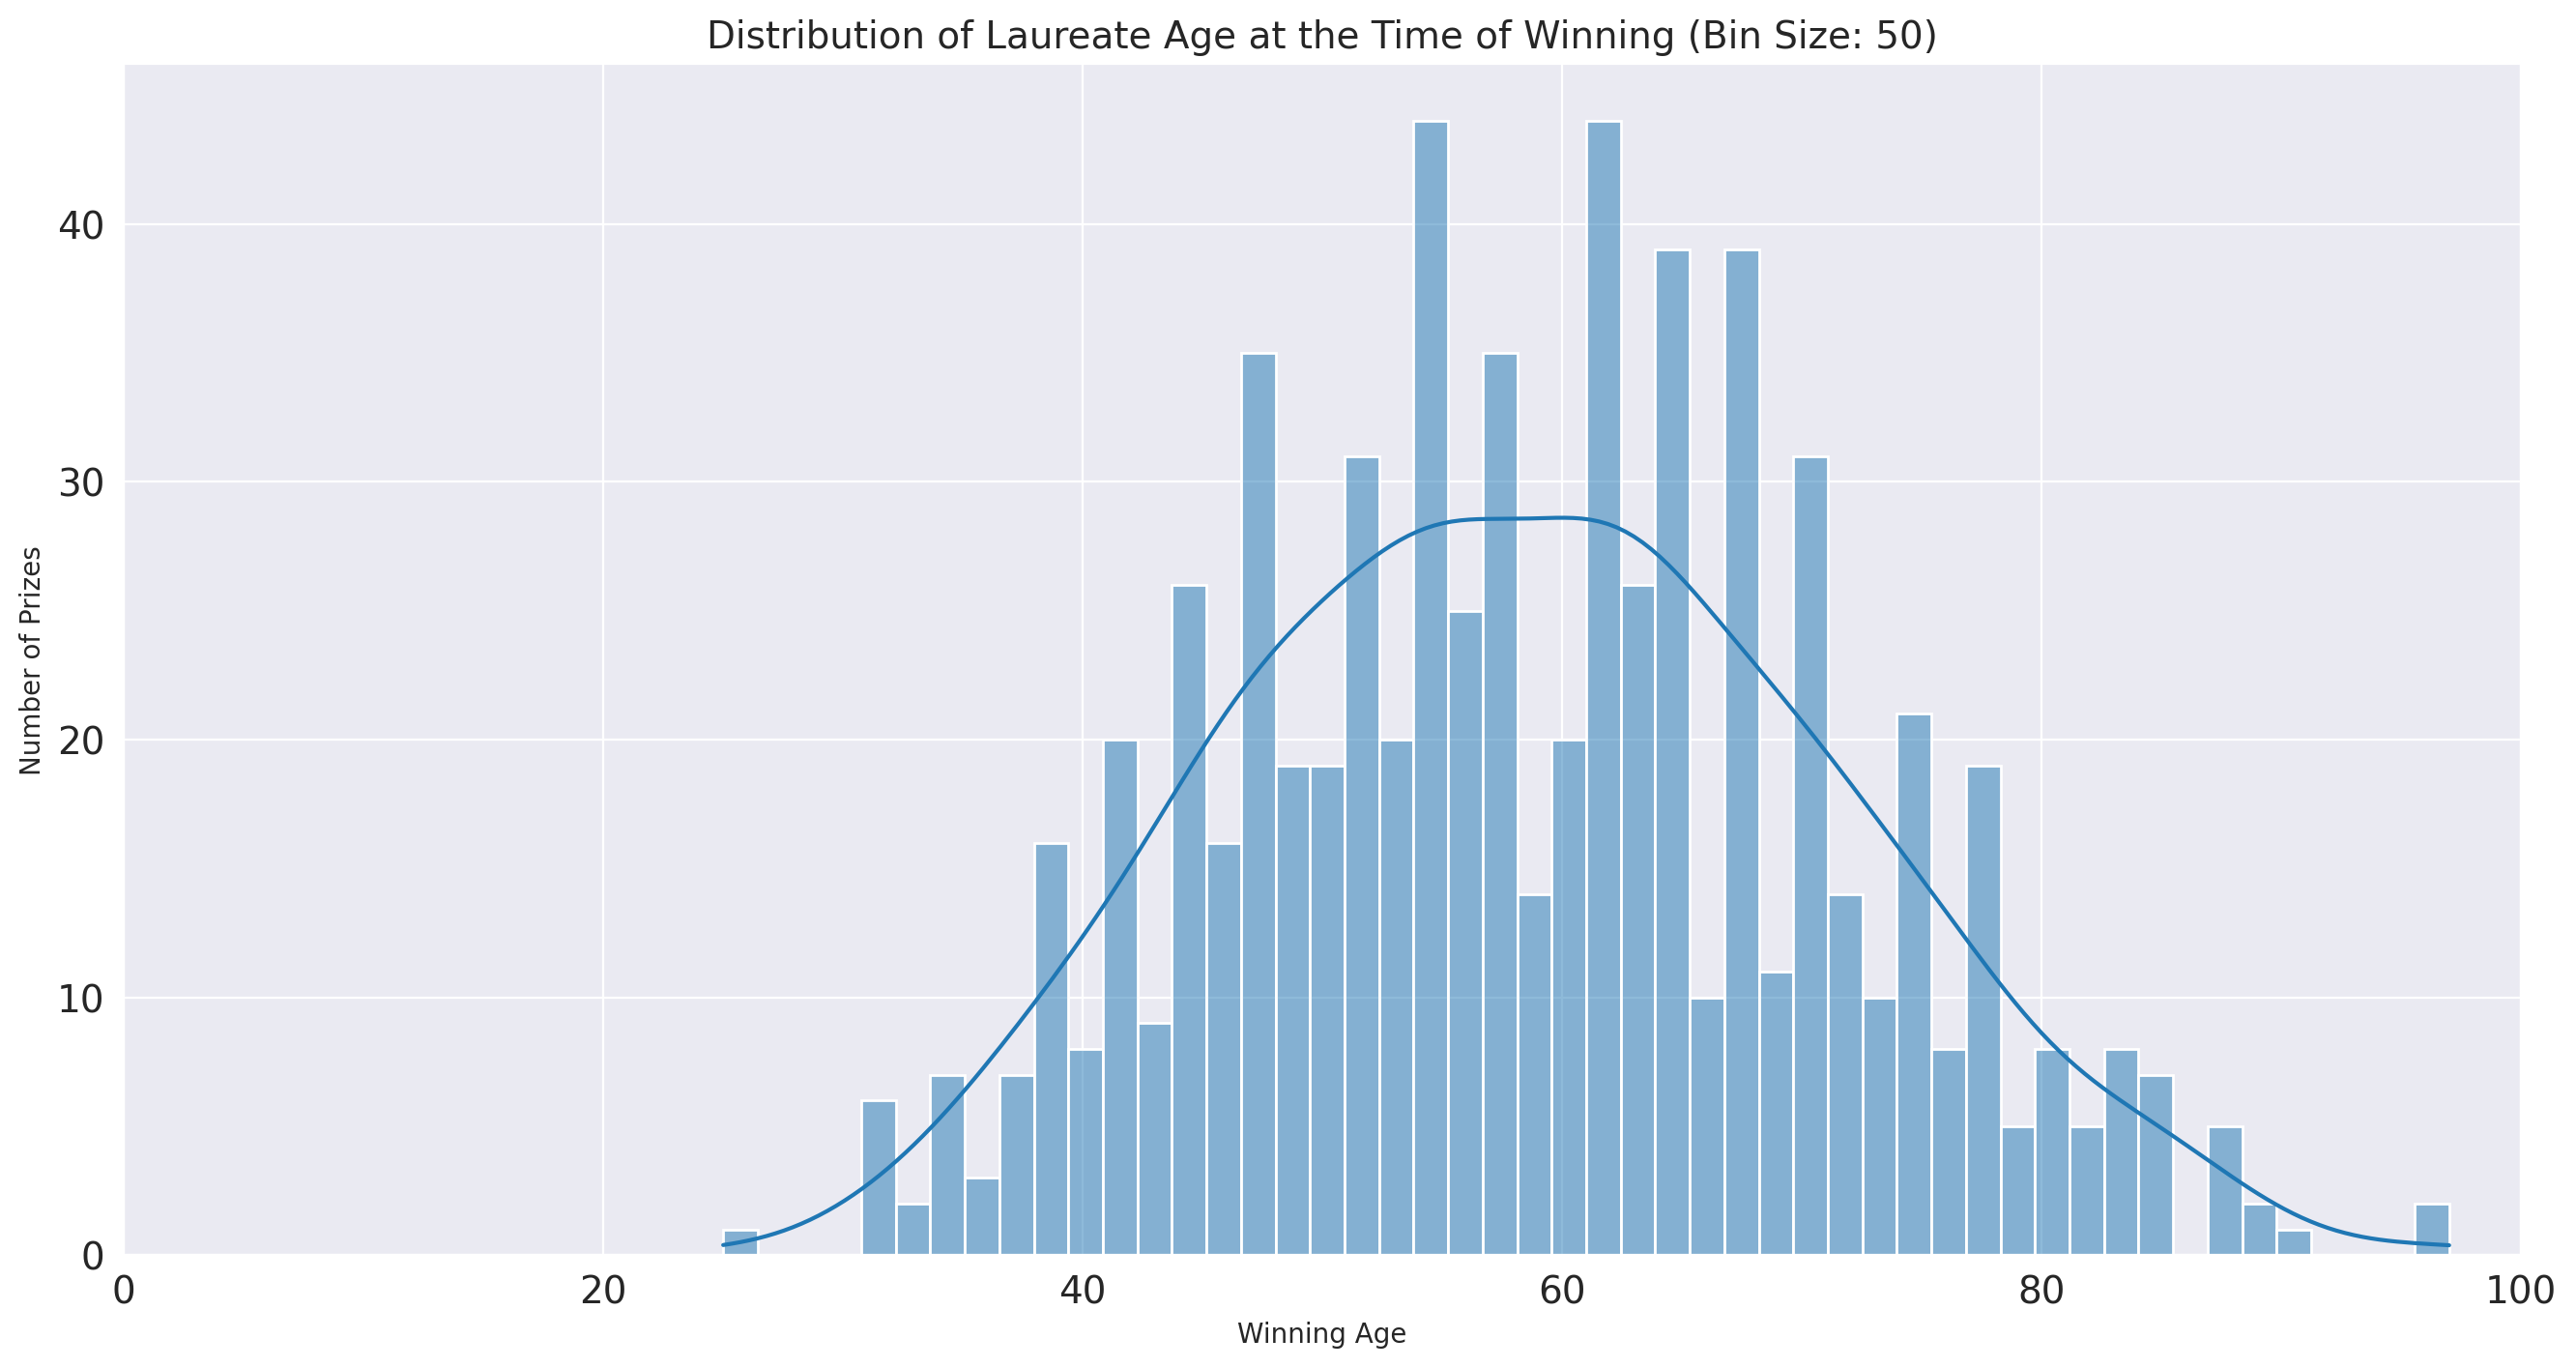

In [89]:
bin_sizes=[10, 20, 30, 50]
for bin_size in bin_sizes:
  plt.figure(figsize=(16, 8), dpi=200)
  plt.xlabel('Winning Age')
  plt.ylabel('Number of Prizes')
  plt.title(f'Distribution of Laureate Age at the Time of Winning (Bin Size: {bin_size})', fontsize=14)
  plt.yticks(fontsize=14)
  plt.xticks(fontsize=14)
  ax=plt.gca()
  ax.set_xlim(0, 100)
  sns.histplot(data=df_data_clean, x='winning_age', bins=bin_size, kde=True)
  plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


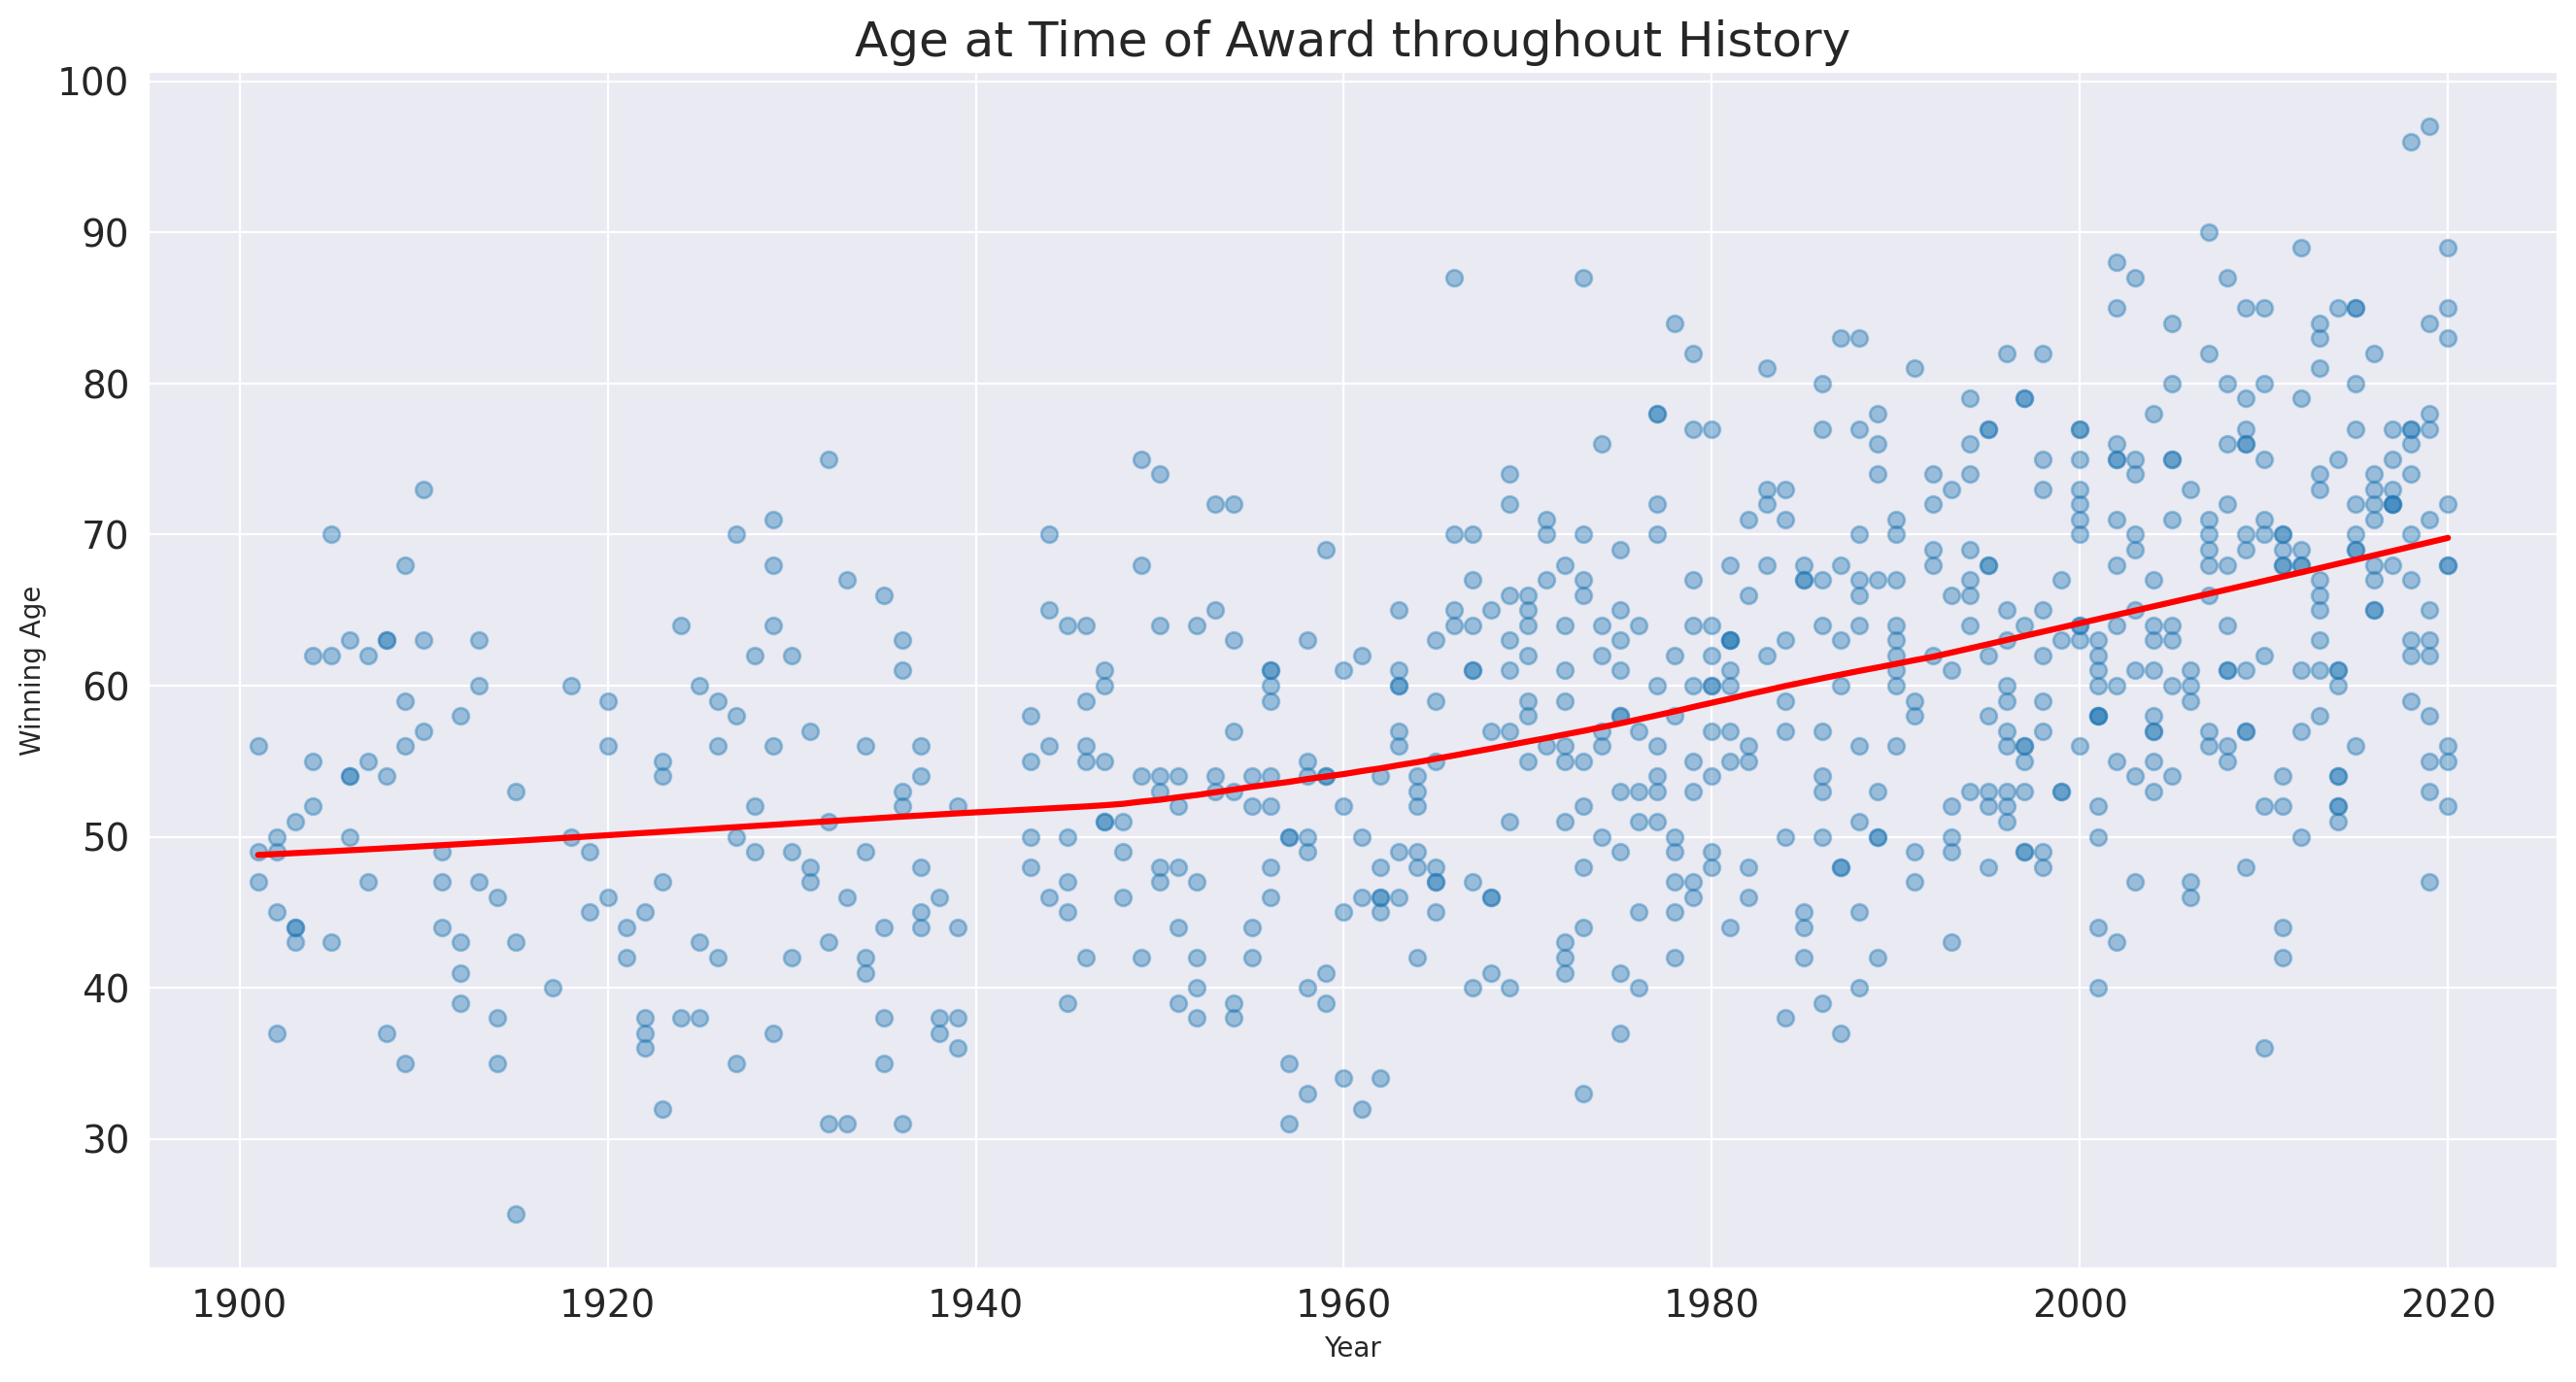

In [90]:
plt.figure(figsize=(16, 8), dpi=200)
with sns.axes_style('darkgrid'):
  sns.regplot(data=df_data_clean, x='year', y='winning_age', ci=None, line_kws={'color':'red'}, lowess=True, scatter_kws={'alpha':0.4})
plt.xlabel('Year')
plt.ylabel('Winning Age')
plt.title('Age at Time of Award throughout History', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [91]:
print("According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?")
print("On average, laureates in those years were often in their mid-40s to about 50 when winning.")

According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
On average, laureates in those years were often in their mid-40s to about 50 when winning.


In [92]:
print("According to the best fit line, what age would it predict for a Nobel laureate in 2020?")
print("The line usually trends higher, typically around 65–70.")
print("So for 2020, it would predict laureates would win at around late 60s.")

According to the best fit line, what age would it predict for a Nobel laureate in 2020?
The line usually trends higher, typically around 65–70.
So for 2020, it would predict laureates would win at around late 60s.


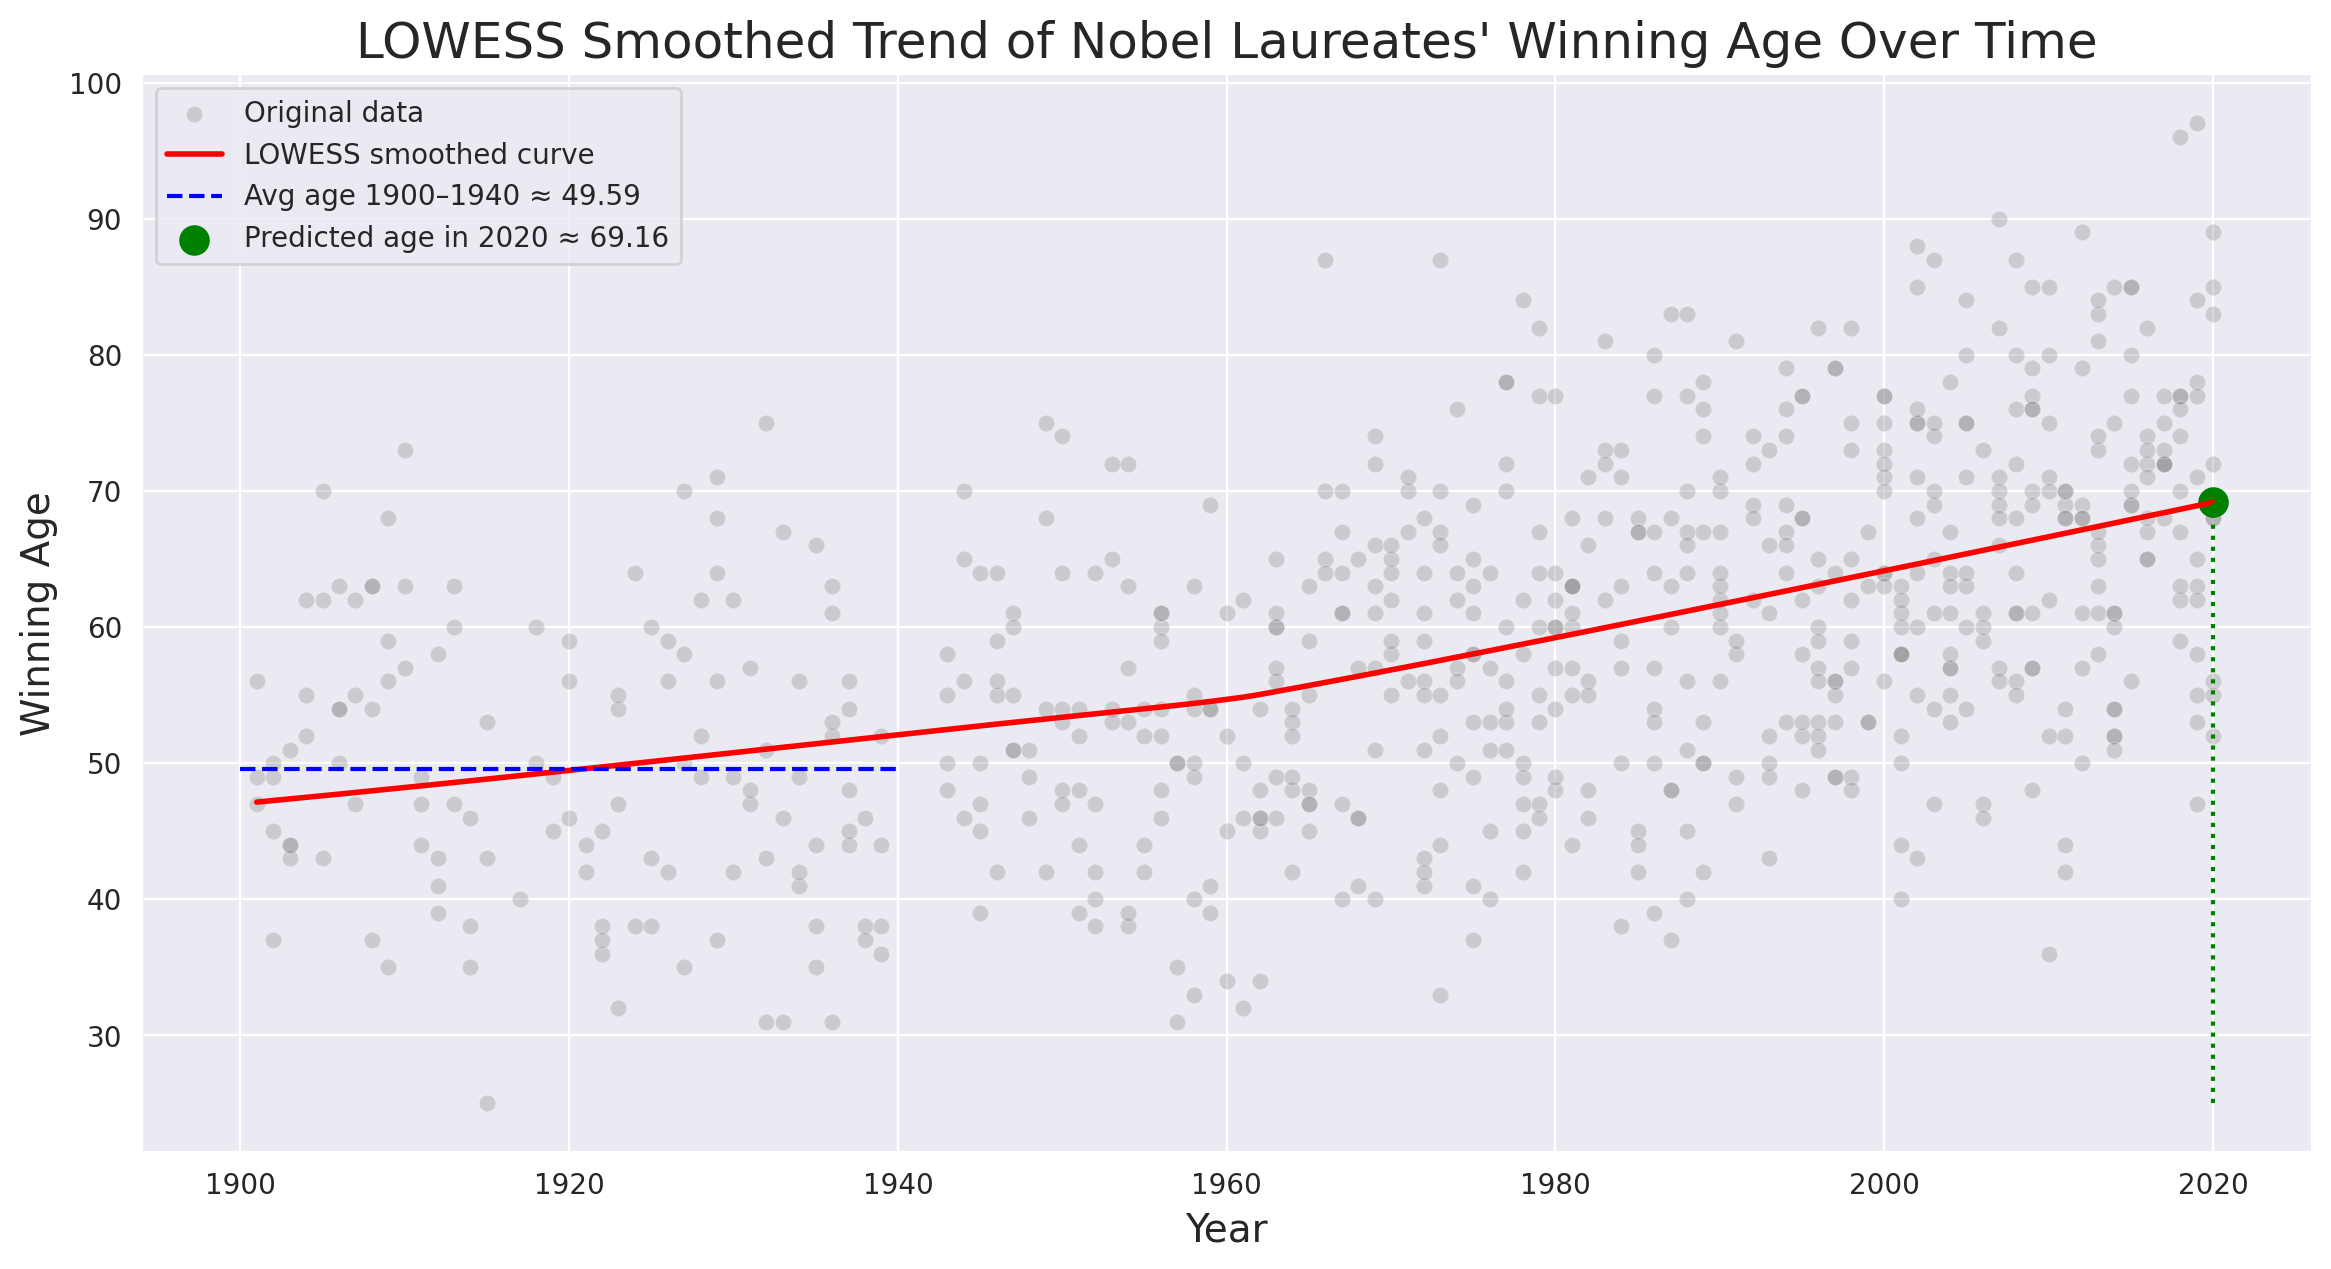

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np

# Step 1: Scatter plot of original data
plt.figure(figsize=(14, 7), dpi=200)
sns.scatterplot(data=df_data_clean, x='year', y='winning_age', alpha=0.3, label='Original data', color='gray')

# Step 2: Apply LOWESS smoothing
lowess_smoothed = lowess(df_data_clean['winning_age'], df_data_clean['year'], frac=0.99)
x_lowess = [d[0] for d in lowess_smoothed]
y_lowess = [d[1] for d in lowess_smoothed]

# Step 3: Plot the LOWESS smoothed curve
plt.plot(x_lowess, y_lowess, color='red', linewidth=2, label='LOWESS smoothed curve')

# Step 4: Highlight average predicted age in 1900–1940
x_lowess_np = np.array(x_lowess)
mask_1900_1940 = (x_lowess_np >= 1900) & (x_lowess_np <= 1940)
avg_age_1900_1940 = np.mean(np.array(y_lowess)[mask_1900_1940])

plt.hlines(avg_age_1900_1940, xmin=1900, xmax=1940, colors='blue', linestyle='--',
           label=f'Avg age 1900–1940 ≈ {avg_age_1900_1940:.2f}')

# Step 5: Mark predicted age in 2020
year_2020_idx = np.argmin(np.abs(x_lowess_np - 2020))
predicted_age_2020 = y_lowess[year_2020_idx]

plt.scatter([2020], [predicted_age_2020], color='green', s=100, label=f'Predicted age in 2020 ≈ {predicted_age_2020:.2f}')
plt.vlines(2020, ymin=min(df_data_clean['winning_age']), ymax=predicted_age_2020, colors='green', linestyle=':')

# Step 6: Final plot styling
plt.title('LOWESS Smoothed Trend of Nobel Laureates\' Winning Age Over Time', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Winning Age', fontsize=14)
plt.legend()
plt.show()


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

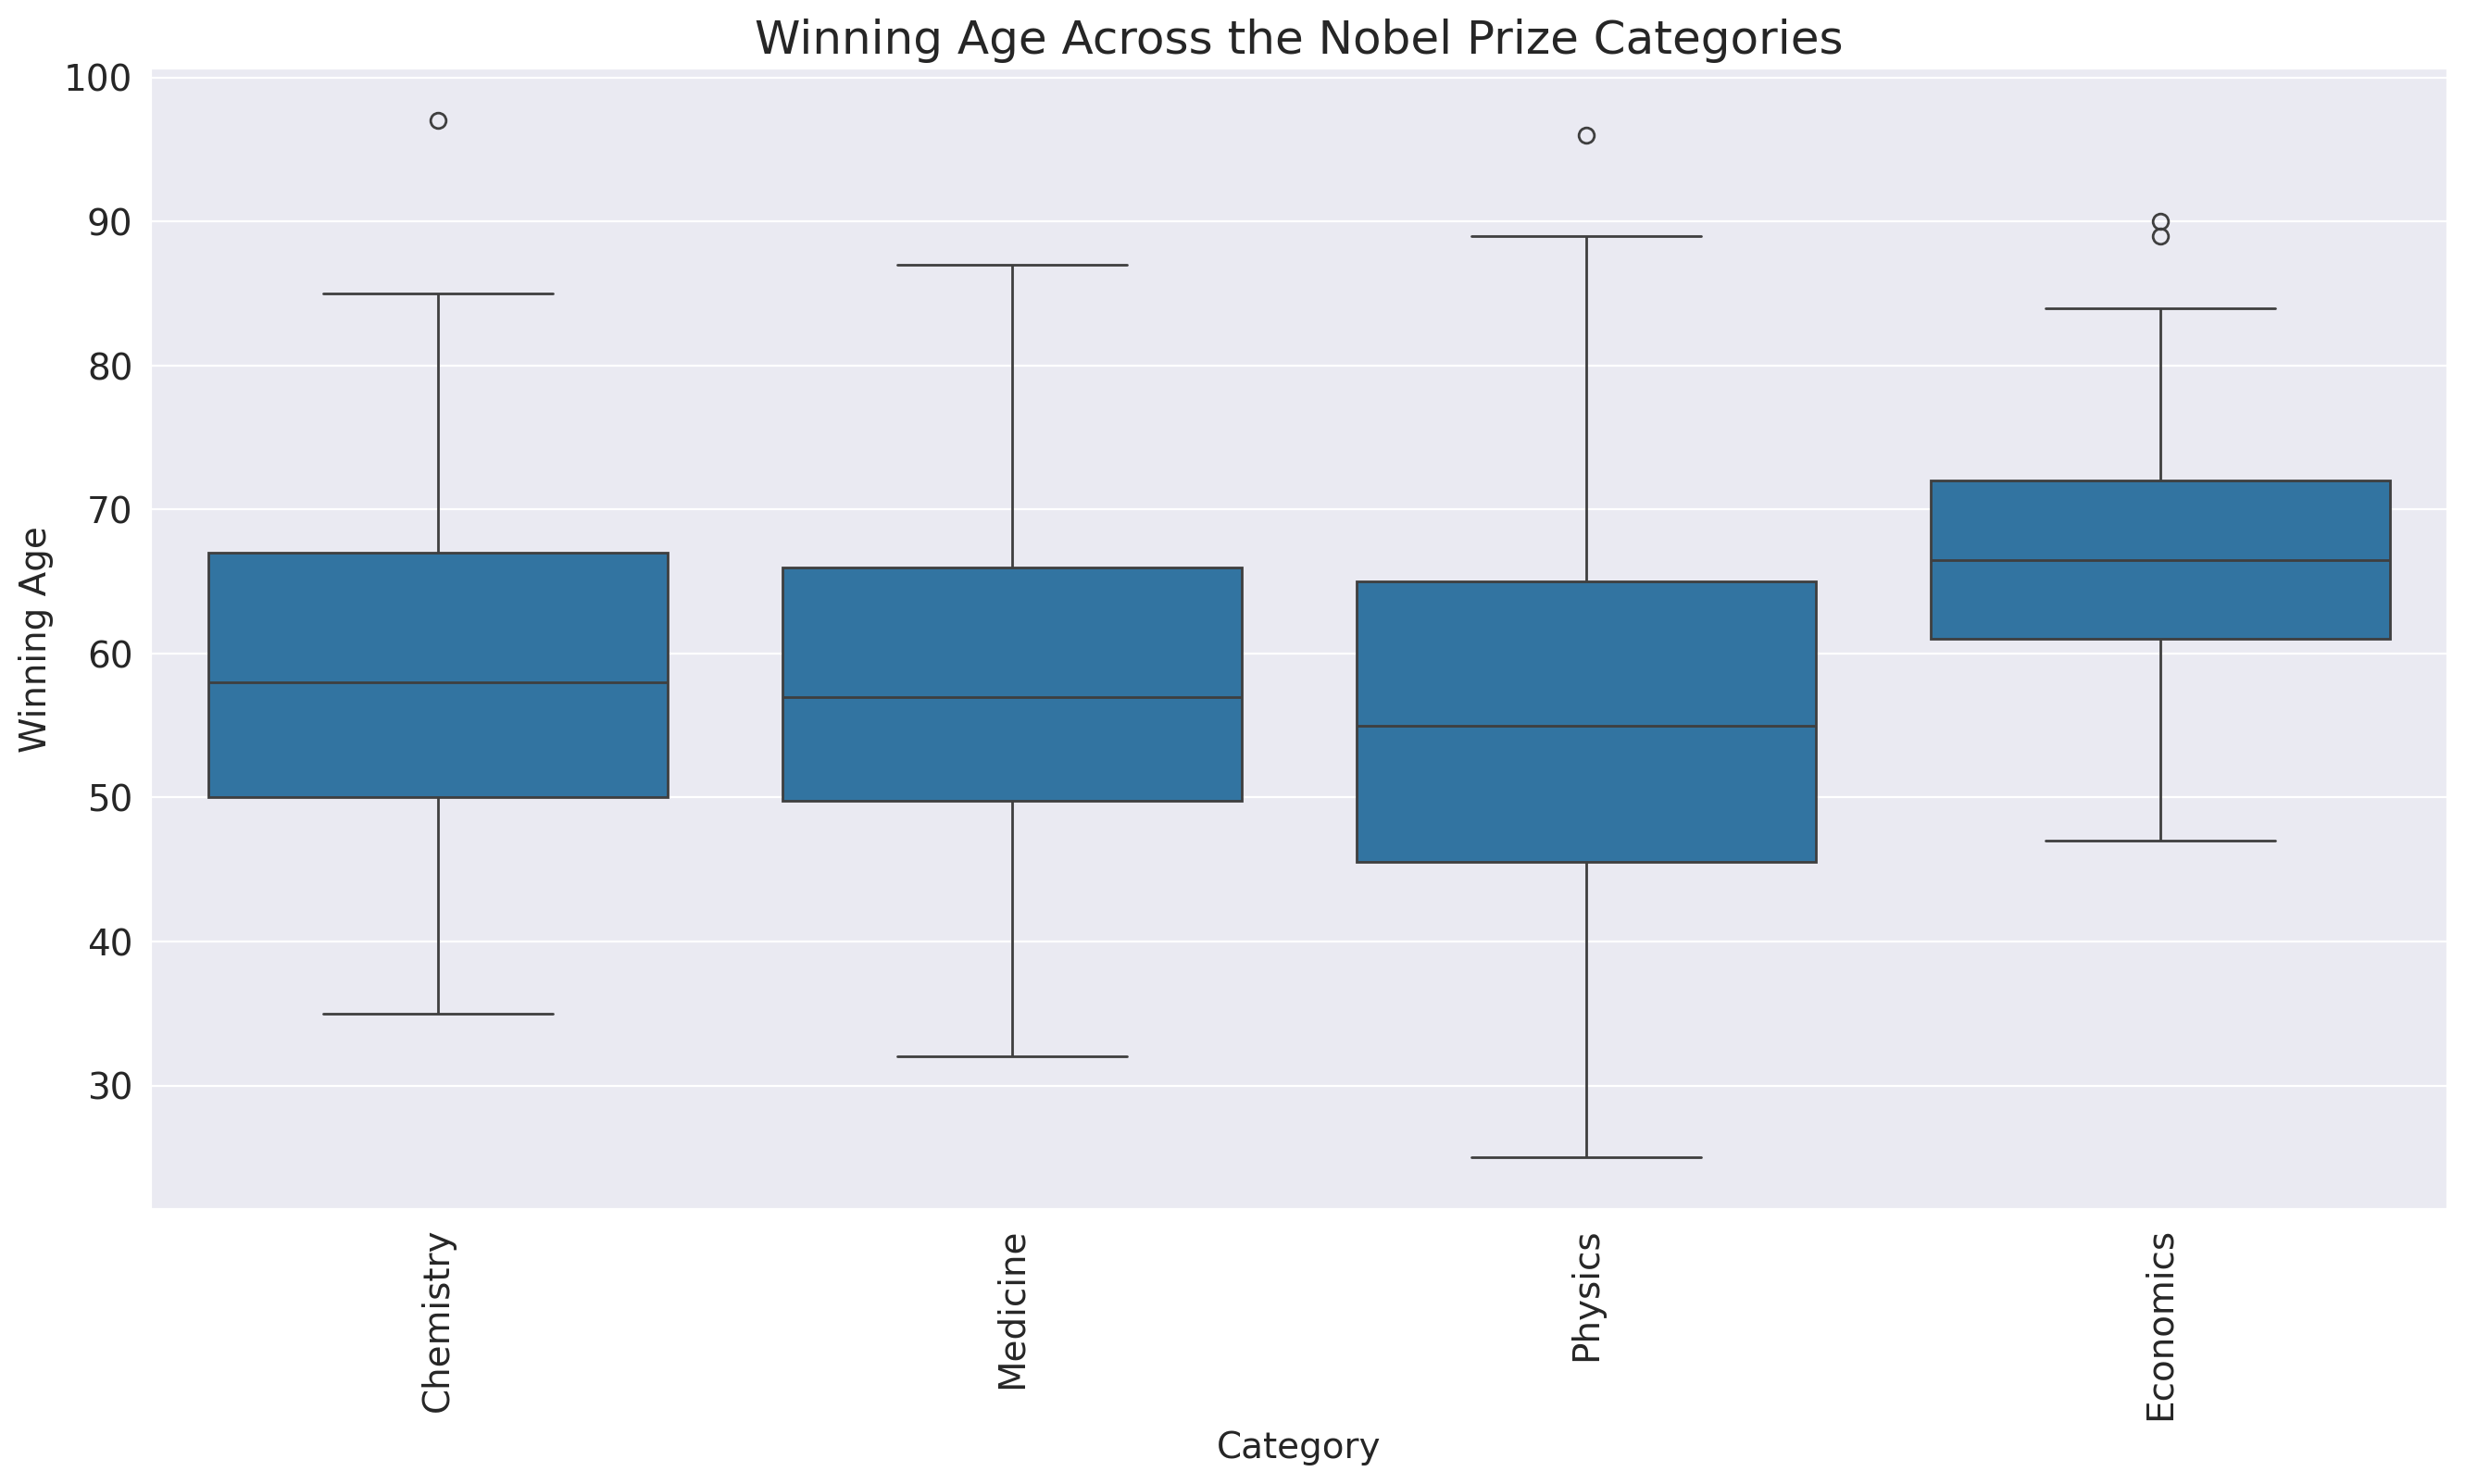

In [100]:
plt.figure(figsize=(16, 8), dpi=200)
sns.boxplot(data=df_data_clean, x='category', y='winning_age')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Winning Age', fontsize=14)
plt.title('Winning Age Across the Nobel Prize Categories', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


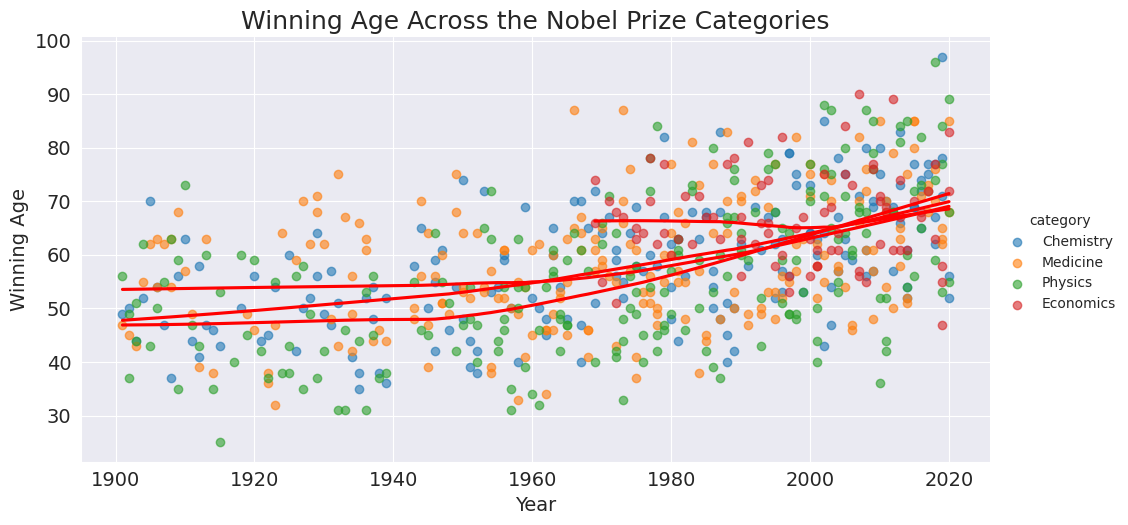

In [101]:
with sns.axes_style('darkgrid'):
  sns.lmplot(data=df_data_clean, x='year', y='winning_age', hue='category', lowess=True, scatter_kws={'alpha':0.6}, aspect=2, line_kws={'color':'red'})
plt.xlabel('Year', fontsize=14)
plt.ylabel('Winning Age', fontsize=14)
plt.title('Winning Age Across the Nobel Prize Categories', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

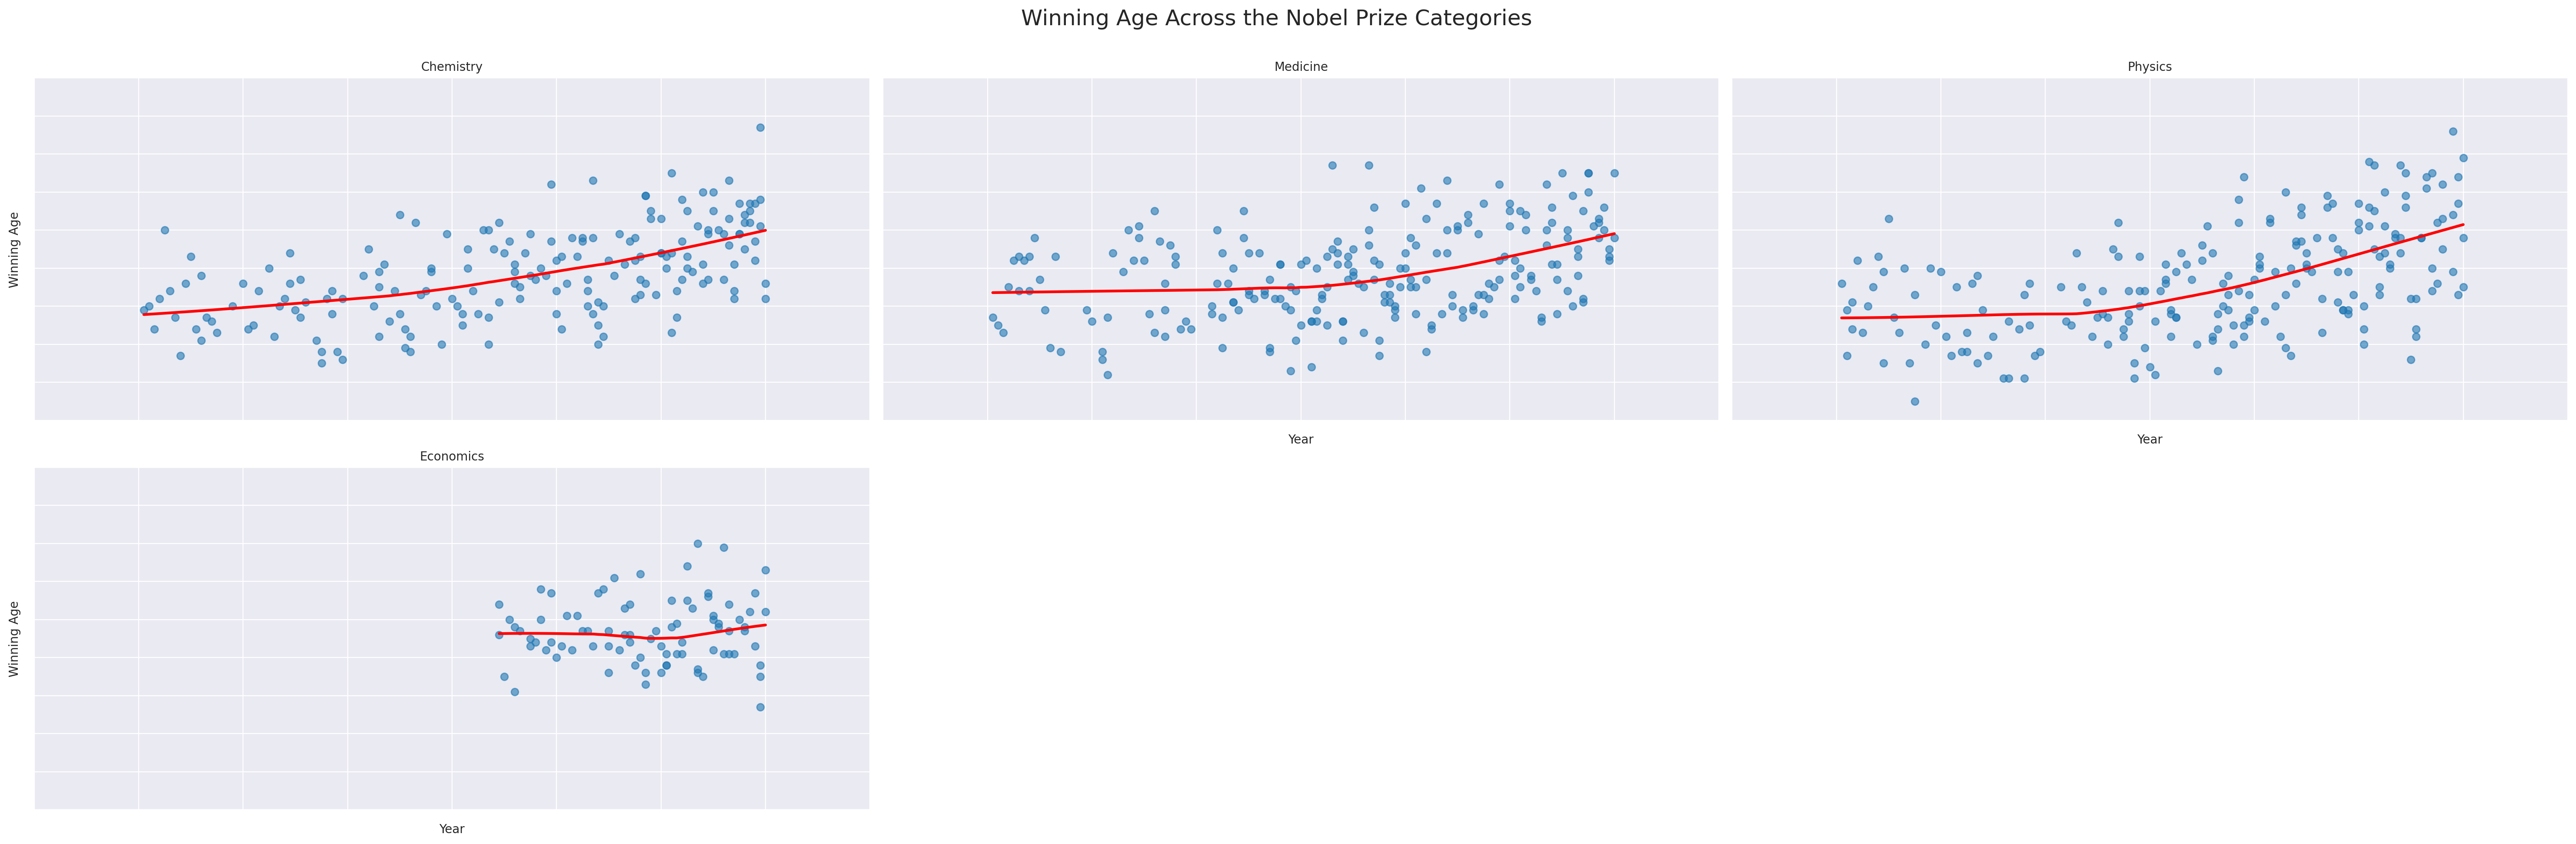

In [106]:
with sns.axes_style('darkgrid'):
    g = sns.lmplot(
        data=df_data_clean,
        x='year',
        y='winning_age',
        col='category',       # one plot per category
        col_wrap=3,           # wrap into multiple rows if many categories
        lowess=True,
        scatter_kws={'alpha':0.6},
        line_kws={'color':'red'},
        height=5,             # each subplot height in inches
        aspect=2              # makes each subplot wider
    )

# Adjust titles and labels
g.set_titles("{col_name}")  # sets title of each facet to category name
g.set_axis_labels("Year", "Winning Age")  # common axis labels
g.set_xticklabels(fontsize=12)
g.set_yticklabels(fontsize=12)

# Make the overall figure bigger / higher DPI
g.fig.set_dpi(200)

# Add a common title for the whole plot
g.fig.subplots_adjust(top=0.9)  # leave space for title
g.fig.suptitle('Winning Age Across the Nobel Prize Categories', fontsize=18)

# Save high-resolution image
g.savefig('winning_age_by_category.png', dpi=300, bbox_inches='tight')

plt.show()
